# Анализ бизнес показателей. Аналитика в Яндекс.Афише

## <a id="content"><a>Содержание проекта:
- #### <a href='#step1'>Шаг 1. Загрузка данных и подготовка их к анализу</a>
    - #### <a href='#step1.1'>1.1. Сохранение исходных данных о визитах, заказах и рекламных расходах в переменные</a>
    - #### <a href='#step1.2'>1.2. Подготовка данных</a>
- #### <a href='#step2'>Шаг 2. Рассчет метрик и построение графиков</a>
    - #### <a href='#step2.1'>2.1. Продуктовые метрики
        - <a href='#step2.1.1'>2.1.1. Расчет DAU, WAU и MAU</a>
        - <a href='#step2.1.2'>2.1.2. Определение среднего числа сессий в день. Изменение с течением времени</a>
        - <a href='#step2.1.3'>2.1.3. Средняя продолжительность пользовательской сессии за весь период. Распределение средней продолжительности сессии по пользователям</a>
        - <a href='#step2.1.4'>2.1.4. Расчет Retention Rate</a>
    - #### <a href='#step2.2'>2.2. Метрики электронной коммерции</a>
        - <a href='#step2.2.1'>2.2.1. Расчет времени между первым посещением и покупкой</a>
        - <a href='#step2.2.2'>2.2.2. Расчет среднеге количества покупок на одного клиента за 6 месяцев</a>
        - <a href='#step2.2.3'>2.2.3. Средняя выручка с пользователя</a>
        - <a href='#step2.2.4'>2.2.4. Изменение во времени накопительного LTV по когортам. Сравнение среднего LTV по когортам за 6 месяцев</a>
    - #### <a href='#step2.3'>2.3. Маркетинговые метрики</a>
        - <a href='#step2.3.1'>2.3.1. Общая сумма расходов на маркетинг. Распределение трат по источникам и изменение во времени</a>
        - <a href='#step2.3.2'>2.3.2. Расчет CAC</a>
        - <a href='#step2.3.3'>2.3.3. Расчет ROMI по когортам в разрезе источников</a>
- #### <a href='#step3'>Шаг 3. Выводы и рекомендации</a> 
    

## <a id="step1"><a>Шаг 1. Загрузка данных и подготовка их к анализу

In [1]:
# Подключение необходимых библиотек
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


### <a id="step1.1"><a>1.1. Сохранение исходных данных о визитах, заказах и рекламных расходах в переменные

In [2]:
# Сохранение данных в переменные:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
# Вывод общей информации и 5 первых строк таблицы "visits"
display(visits.info())
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

#### Описание данных:
- *"Device"* - тип используемого устройстова, тип данных *'object'* - соответствует сохранённым значениям;
- "End Ts" - дата окончания сессии, тип данных *'object'* - необходимо заменить на тип *'datetime'*;
- "Source Id" - идентификатор источника траффика, тип данных *'int64'* - соответствует сохранённым значениям;
- "Start Ts" - дата начала сессии, тип данных *'object'* - необходимо заменить на тип *'datetime'*;
- "Uid" - уникальный идентификатор пользователя, тип данных *'uint64'* - соответствует сохранённым значениям.

In [4]:
# Вывод общей информации и 5 первых строк таблицы "orders"
display(orders.info())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

#### Описание данных:
- "Buy Ts" - дата дата совершения покупки, тип данных *'object'* - необходимо заменить на тип *'datetime'*;
- "Revenue" - выручка, тип данных *'float64'* - соответствует сохранённым значениям;
- "Uid" - уникальный идентификатор пользователя, тип данных *'uint64'* - соответствует сохранённым значениям.

In [5]:
# Вывод общей информации и 5 первых строк таблицы "costs"
display(costs.info())
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

#### Описание данных:
- "source_id" - идентификатор источника траффика, тип данных *'int64'* - соответствует сохранённым значениям;
- "dt" - дата расходов, тип данных *'object'* - необходимо заменить на тип *'datetime'*;
- "costs" - расходы, тип данных *'float64'* - соответствует сохранённым значениям.

### Выводы:
- пропуски в данных отсутствуют;
- названия столбцов необходимо привести к нижнему регистру, а также заменить пробелы на нижнее подчеркивание;
- привести все данные в столбцах с датами к типу *'datetime'*.

<a href='#content'>К содержанию</a>

### <a id="step1.2"><a>1.2. Подготовка данных

In [6]:
# Подготовка данных таблицы "visits":

# Приведение названий столбцов к нижнему регистру:
for i, column in reversed(list(enumerate(visits))):
    visits.rename(columns={column: column.lower()}, inplace=True)

# Замена пробелов нижнем подчеркиванием:
visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id', 'start ts': 'start_ts'}, inplace=True)

# Приведение к необходимым типам данных:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

# Проверка: 
visits.info()

# Определение временного диапазона:
print ('Временной диапазон для столбца "end_ts":', visits['end_ts'].min(), visits['end_ts'].max())
print ('Временной диапазон для столбца "start_ts":', visits['start_ts'].min(), visits['start_ts'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
Временной диапазон для столбца "end_ts": 2017-06-01 00:02:00 2018-06-01 01:26:00
Временной диапазон для столбца "start_ts": 2017-06-01 00:01:00 2018-05-31 23:59:00


In [7]:
# Подготовка данных таблицы "orders":

# Приведение названий столбцов к нижнему регистру:
for i, column in reversed(list(enumerate(orders))):
    orders.rename(columns={column: column.lower()}, inplace=True)

# Замена пробелов нижнем подчеркиванием:
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)

# Приведение к необходимым типам данных:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

# Проверка: 
orders.info()

# Определение временного диапазона:
print ('Временной диапазон для столбца "buy_ts":', orders['buy_ts'].min(), orders['buy_ts'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
Временной диапазон для столбца "buy_ts": 2017-06-01 00:10:00 2018-06-01 00:02:00


In [8]:
# Подготовка данных таблицы "costs":

# Приведение к необходимым типам данных:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d %H:%M:%S')

# Проверка: 
costs.info()

# Определение временного диапазона:
print ('Временной диапазон для столбца "dt":', costs['dt'].min(), costs['dt'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
Временной диапазон для столбца "dt": 2017-06-01 00:00:00 2018-05-31 00:00:00


In [9]:
# Количество посещений и покупок за "2018-06-01":
print ('Кол-во сессий, начавшихся "2018-06-01":',
       visits[visits['start_ts'] > '2018-06-01 00:00:00']['start_ts'].count())
print ('Кол-во сессий, закончившихся "2018-06-01":',
       visits[visits['end_ts'] > '2018-06-01 00:00:00']['end_ts'].count())
print ('Кол-во покупок за "2018-06-01":', 
       orders[orders['buy_ts'] > '2018-06-01 00:00:00']['buy_ts'].count())


Кол-во сессий, начавшихся "2018-06-01": 0
Кол-во сессий, закончившихся "2018-06-01": 11
Кол-во покупок за "2018-06-01": 1


In [10]:
# Оставляем данные по совпадающему вркмменому диапазону:
visits = visits[visits['end_ts'] < '2018-06-01 00:00:00']
orders = orders[orders['buy_ts'] < '2018-06-01 00:00:00']

### Вывод:
Проведены мероприятия по подготовке данных к анализу:
- названия столбцов приведены к нижнему регистру, а также заменены пробелы на нижнее подчеркивание;
- данные приведены к необходимому типу;
- проверены времменные диапазоны во всех таблицах: выявлено, что последняя дата в таблице расходов - "2018-05-31", тогда как в таблицах с посещениями и покупками - это "2018-06-01". Так как, количество посещений и покупок в этот день очень мало, принято решение не учитывать в дальнейшем анализе данные за этот день.

<a href='#content'>К содержанию</a>

## <a id="step2"><a>Шаг 2. Рассчет метрик и построение графиков

### <a id="step2.1"><a>2.1. Продуктовые метрики

#### <a id="step2.1.1"><a>2.1.1. Расчет DAU, WAU и MAU

In [11]:
# Выделение в отдельные столбцы года, месяца, недели и даты сессии:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

# Вывод первых 5 строк:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year session_month  session_week session_date  
0  16879256277535980062          2017    2017-12-01            51   2017-12-20  
1    104060357244891740          2018    2018-02-01             8   2018-02-19  
2   7459035603376831527          2017    2017-07-01            26   2017-07-01  
3  16174680259334210214          2018    2018-05-01            20   2018-05-20  
4   9969694820036681168          2017    2017-12-01            52   2017-12-27

In [12]:
# Функция для построения линейного графика:
def line_plot(data, x_name, y_name, title):
    plt.figure(figsize=(15, 5), dpi = 200)
    ax = sns.lineplot(data = data, x=x_name, y=y_name)
    plt.gcf().autofmt_xdate()
    ax.set_title(title, fontdict = {'fontsize': 15})
    ax.grid()
    plt.show()
    plt.close()

Среднее значение DAU: 908.0


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


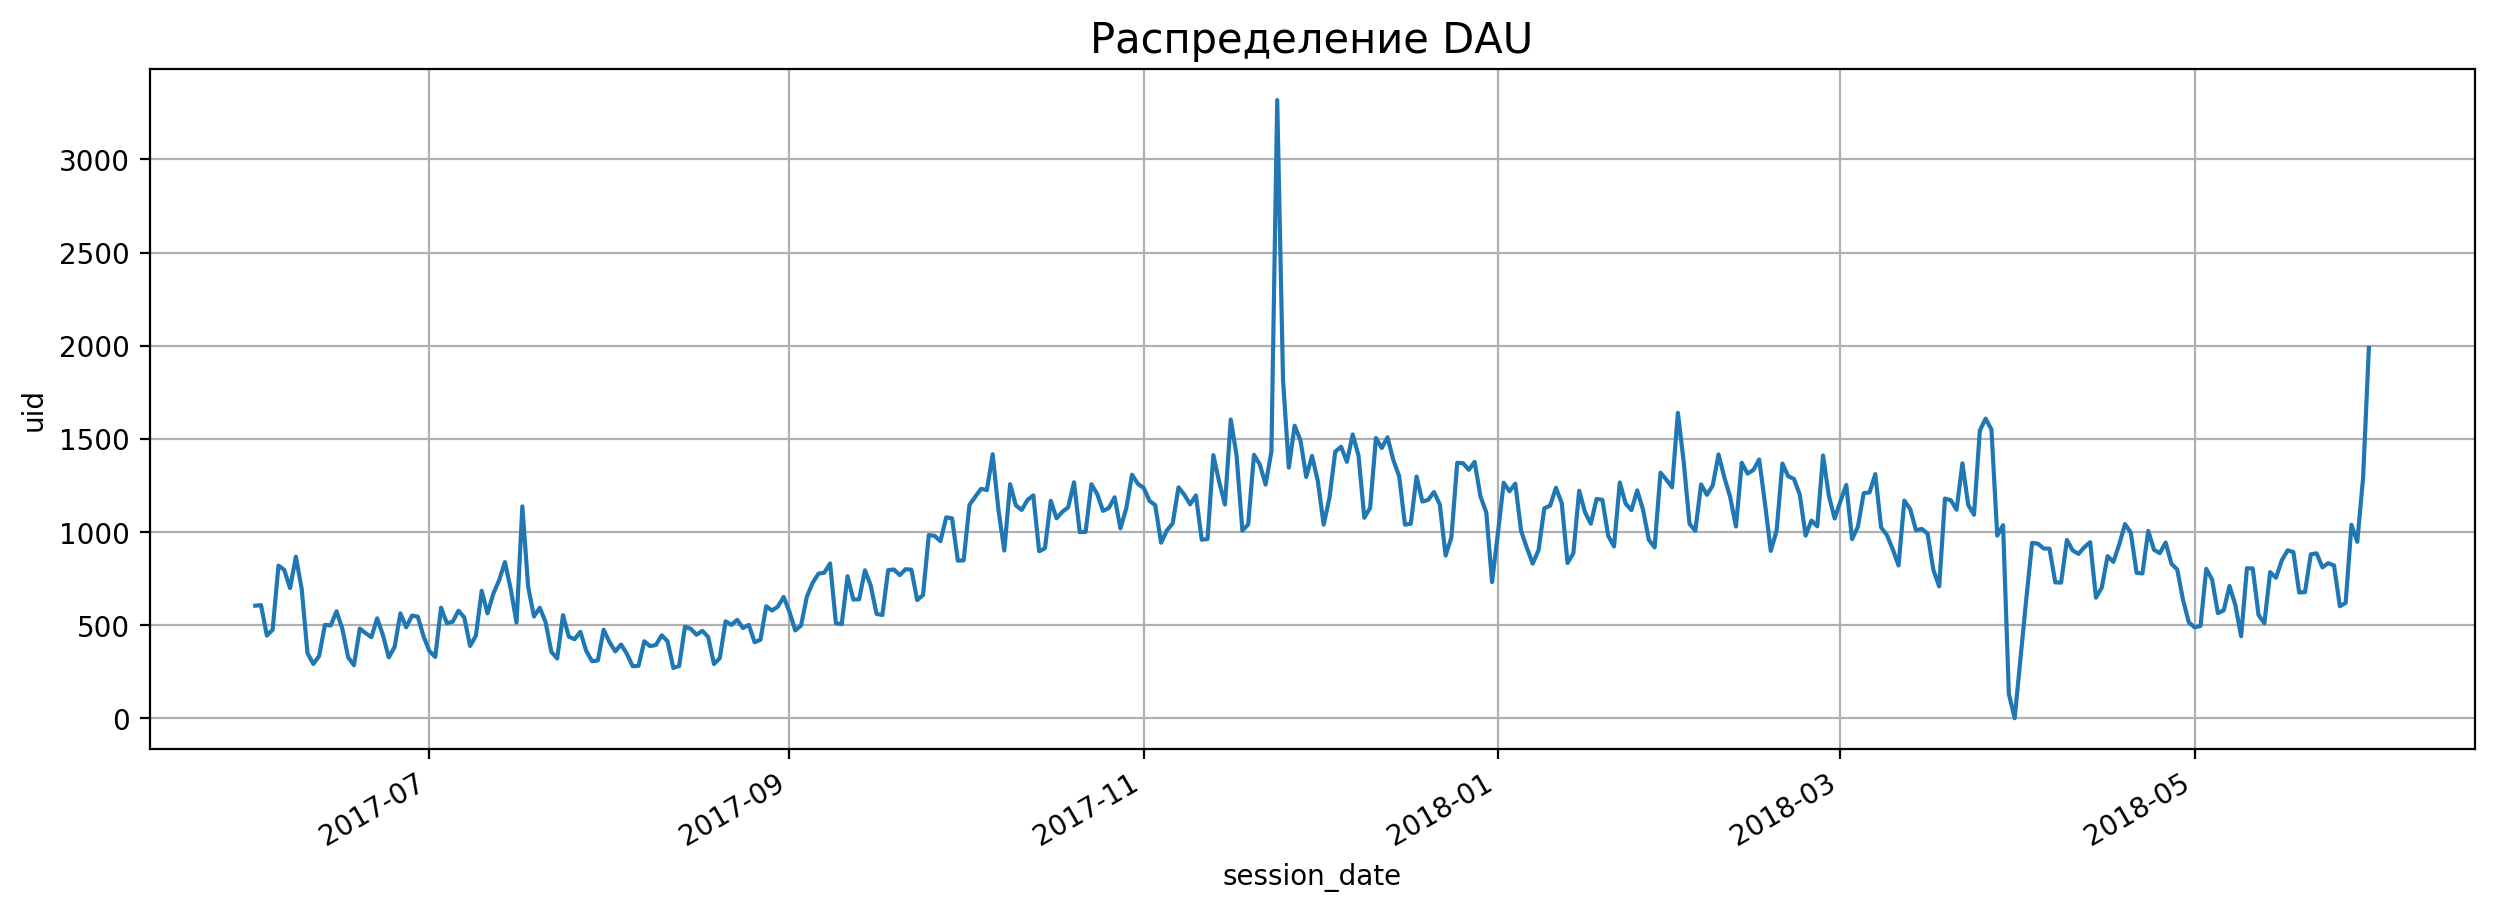

In [13]:
# Расчет DAU:
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()

# Вывод среднего значения:
print ('Среднее значение DAU:', dau['uid'].mean().round(0))

# Построение графика:
line_plot(dau, 'session_date', 'uid', 'Распределение DAU')


In [14]:
print ('Максимальное число посещений:')
display(dau[dau['uid'] == dau['uid'].max()])
print ('Минимальное число посещений:')
display(dau[dau['uid'] == dau['uid'].min()])

Максимальное число посещений:


session_date   uid
176   2017-11-24  3319

Минимальное число посещений:


session_date  uid
303   2018-03-31    1

Среднее значение WAU: 5716.0


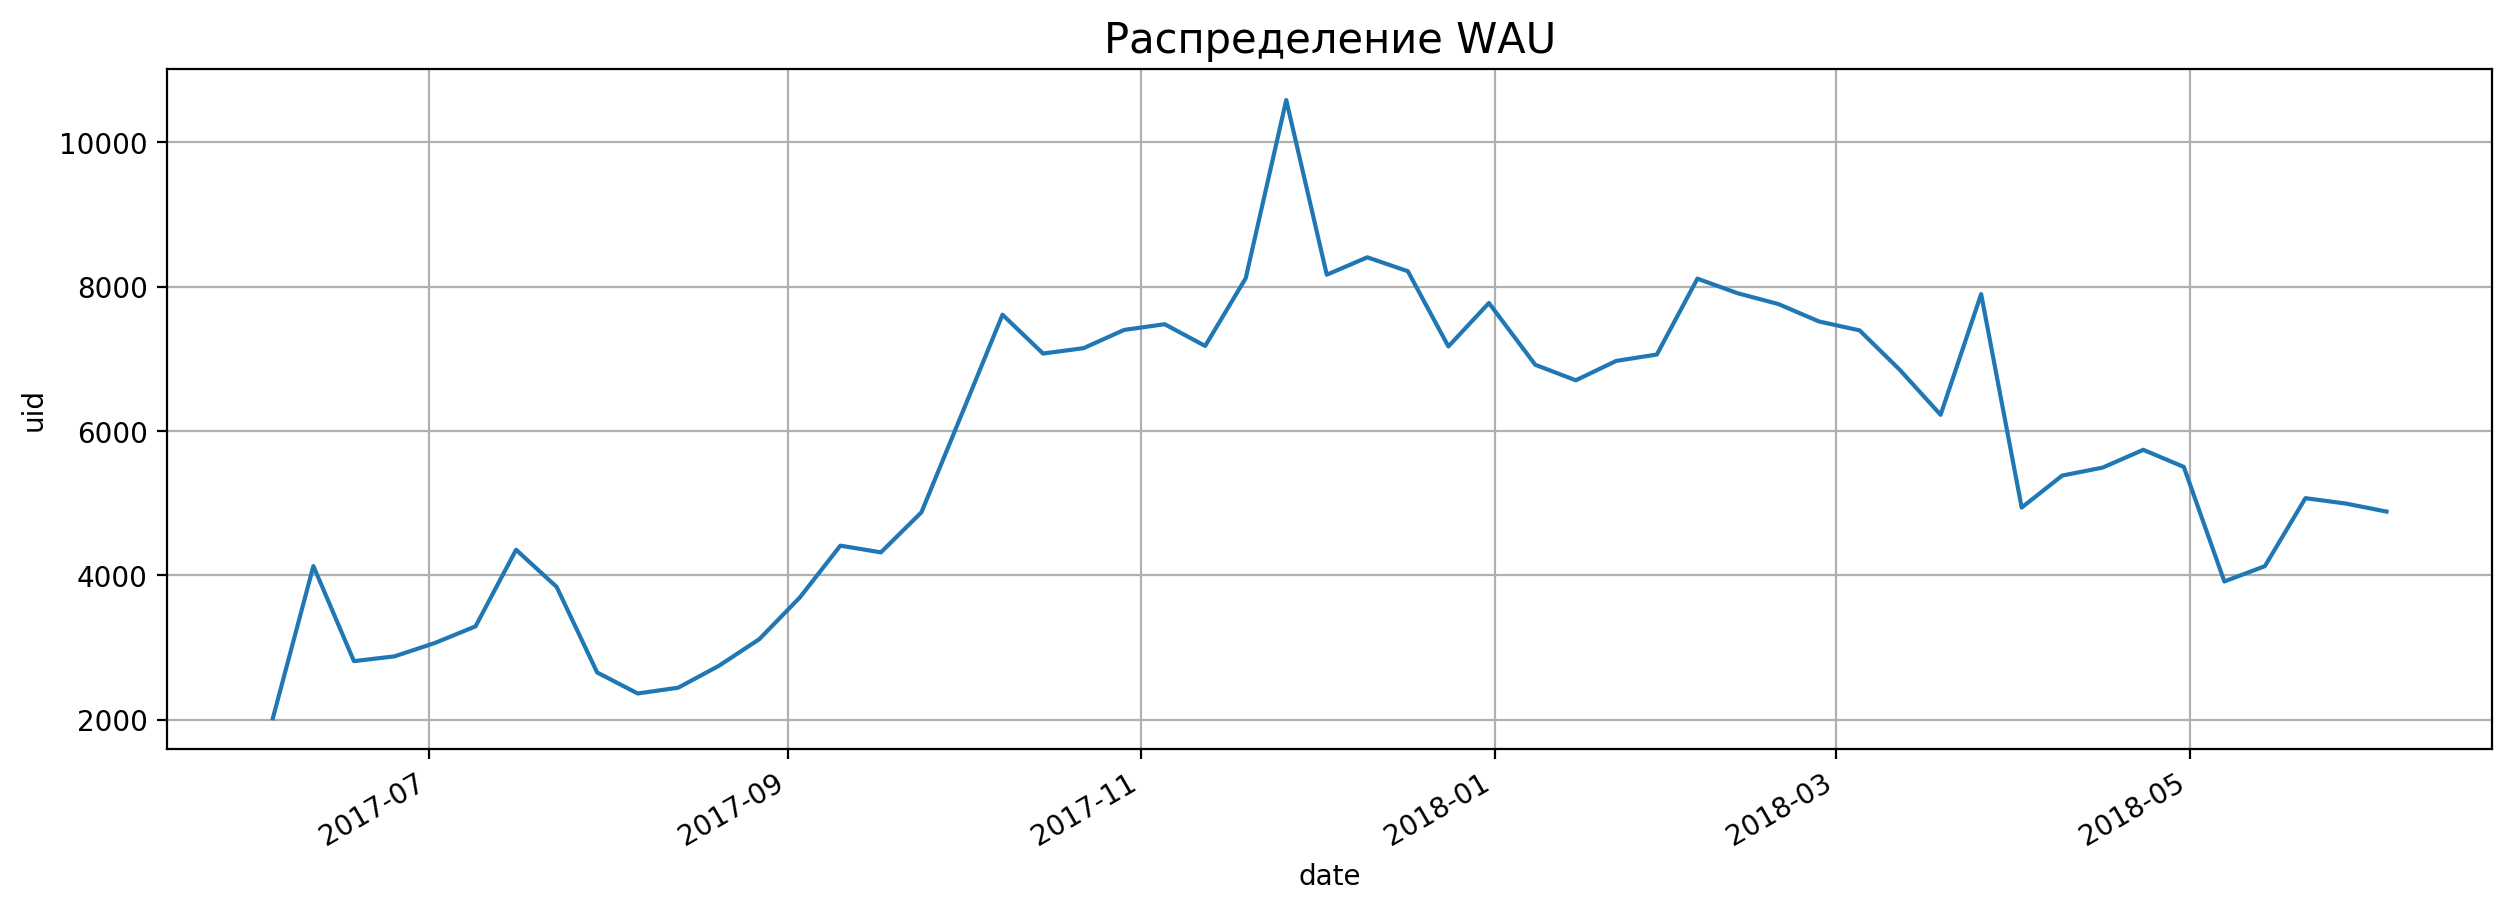

In [15]:
# Расчет WAU:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
# Столбец с датой (год - неделя):
# Сохраняем в столбец год в формате "datetime":
wau['date'] = pd.to_datetime(wau['session_year'].astype(str))#

# Функция для получения даты для построения графика:
def correct_date(row):
    row['date'] = row['date'] + pd.Timedelta(weeks=row['session_week'])
    return row

# Применение функции "correct_date":
wau = wau.apply(correct_date, axis = 1)

# Вывод среднего значения:
print ('Среднее значение WAU:', wau['uid'].mean().round(0))

# Построение графика:
line_plot(wau, 'date', 'uid', 'Распределение WAU')


Среднее значение MAU: 23228.0


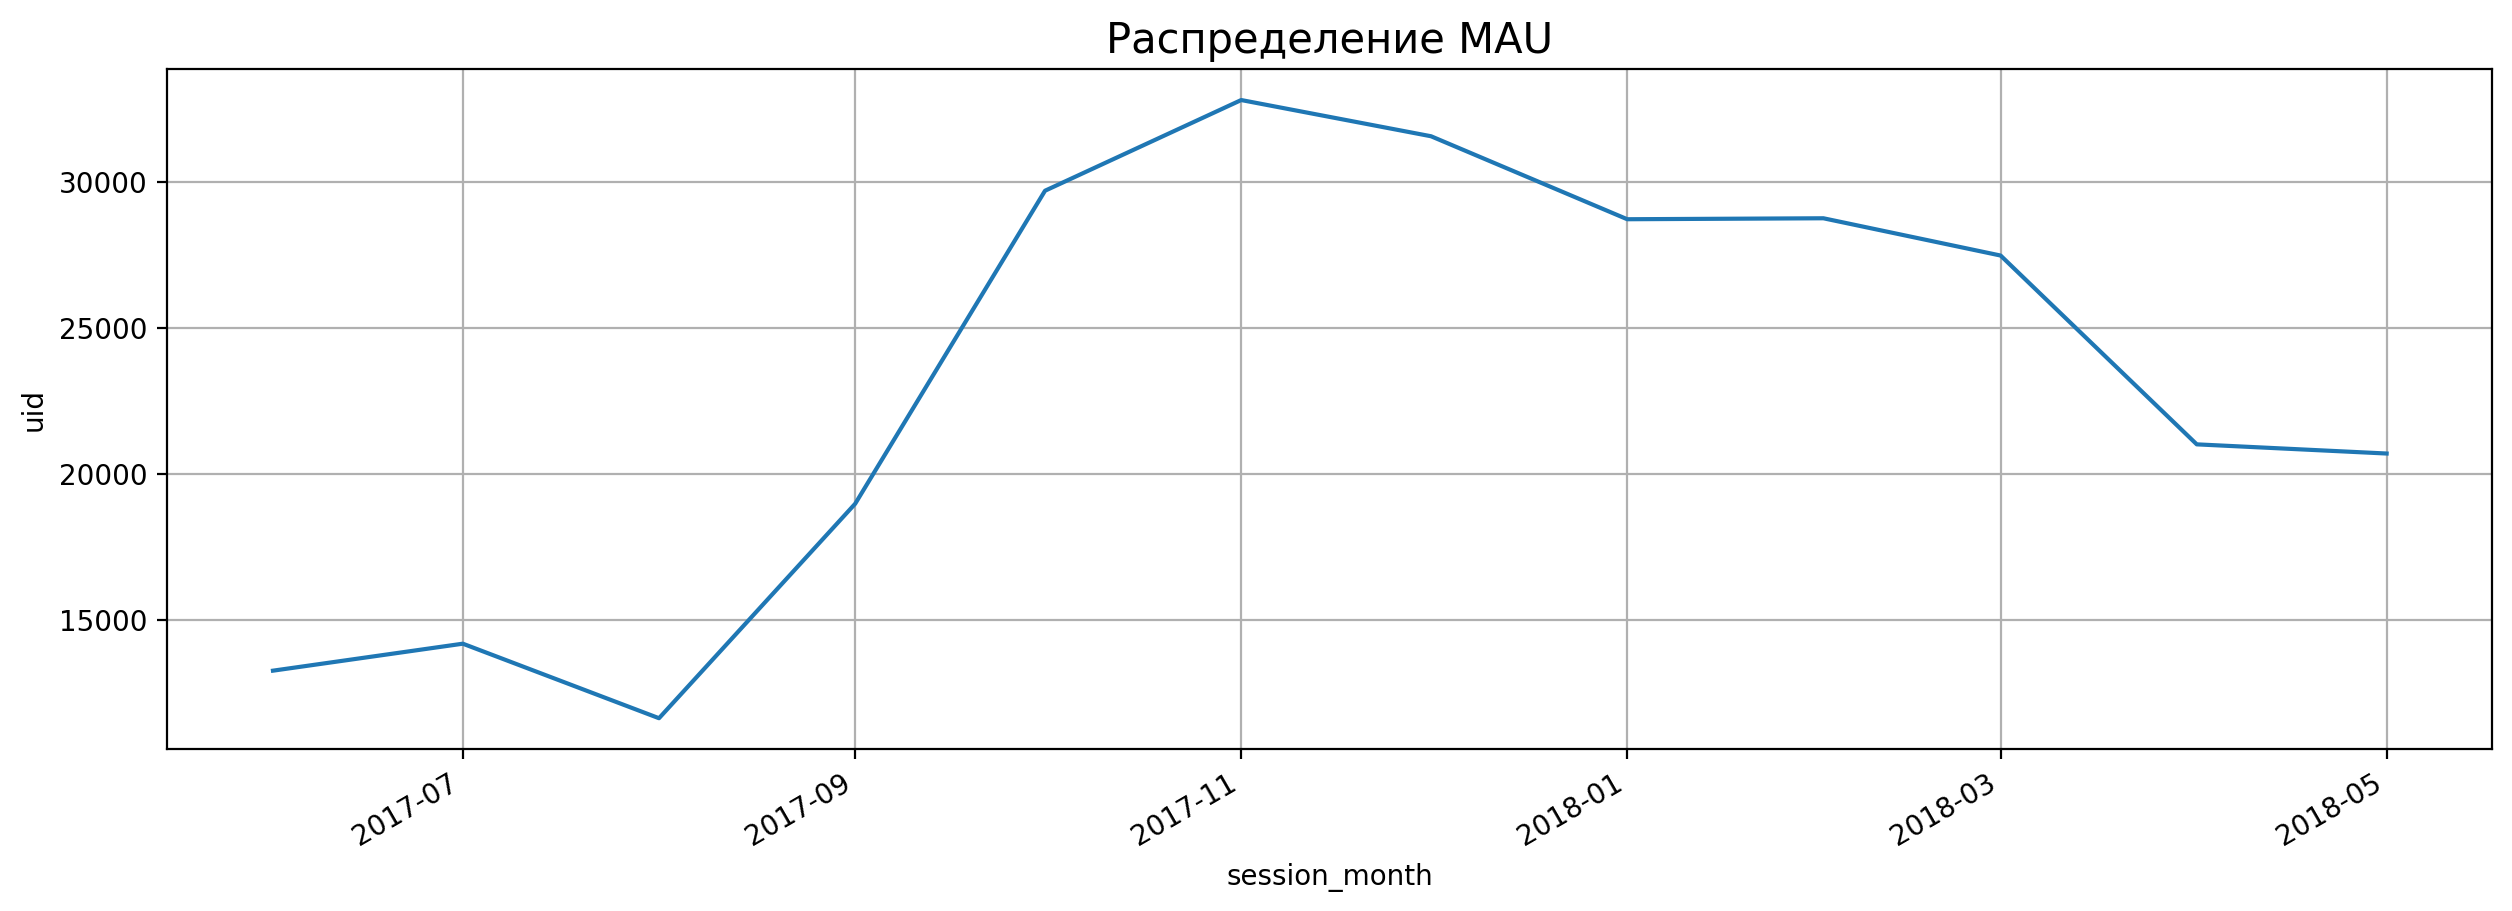

In [16]:
# Расчет MAU:
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
# Столбец с датой (год - месяц):
#mau['date'] = pd.to_datetime(mau[['session_year', 'session_month']].astype(str).agg('-'.join, axis=1))

# Вывод среднего значения:
print ('Среднее значение MAU:', mau['uid'].mean().round(0))

# Построение графика:
line_plot(mau, 'session_month', 'uid', 'Распределение MAU')


### Вывод:
- **Изменение количества посещений в день DAU:** Среднее значение за весь период составляет 908 посещений / день. 
    - На протяжении первых трех месяцев количество посещений в день колеблется около отметки в 500 посещений
    - Затем рост в следующий месяц и выход на новый уровень между 1000 и 1500 посещений, который сохраняется в течение примерно полугода. Исключением в этот период является дата "2017-11-24", где наблюдается увеличение кол-ва просмотров до отметки в 3319 посещений. Данный период заканчивается аномально низким значением "2018-03-31" - 1 посещение.
    - Далее, в диапазоне от 500 до 1000 посещений c резким увеличением в конце периода.
    - По данной метрике хорошо отслеживать мгновенные реакции пользователей на изменения сервиса, проведение акций или какие-либо технические неисправности в работе сайта.
- **Изменение количества посещений в день WAU:** Среднее значение за весь период составляет 5716 посещений / день.
    - Так же как и на предыдущем графике, наблюдаются примерно те же интервалы роста и падения.
    - Максимальное значение в неделю, содержащюю дату "2017-11-24"
    - По данной метрике так же можно отслеживать реакцию пользователей на проведение каких-либо рекламных кампаний.
- **Изменение количества посещений в день MAU:** Среднее значение за весь период составляет 23228 посещений / день.
    - Имеем более четкий график (без "шумов" как на предыдущих графиках)
    - Четко наблюдается небольшое изменение в течение превых трех месяцев.
    - Стремительный рост до максимального значения в следующие 3 месяца.
    - Более плавное, но постоянное снижение количества посещений на оставшемся интервале.
    - По данной метрике можно уже оценивать общее развитие сервиса.

<a href='#content'>К содержанию</a>

#### <a id="step2.1.2"><a>2.1.2. Определение среднего числа сессий в день. Изменение с течением времени

Среднее число сессий в день: 987.0


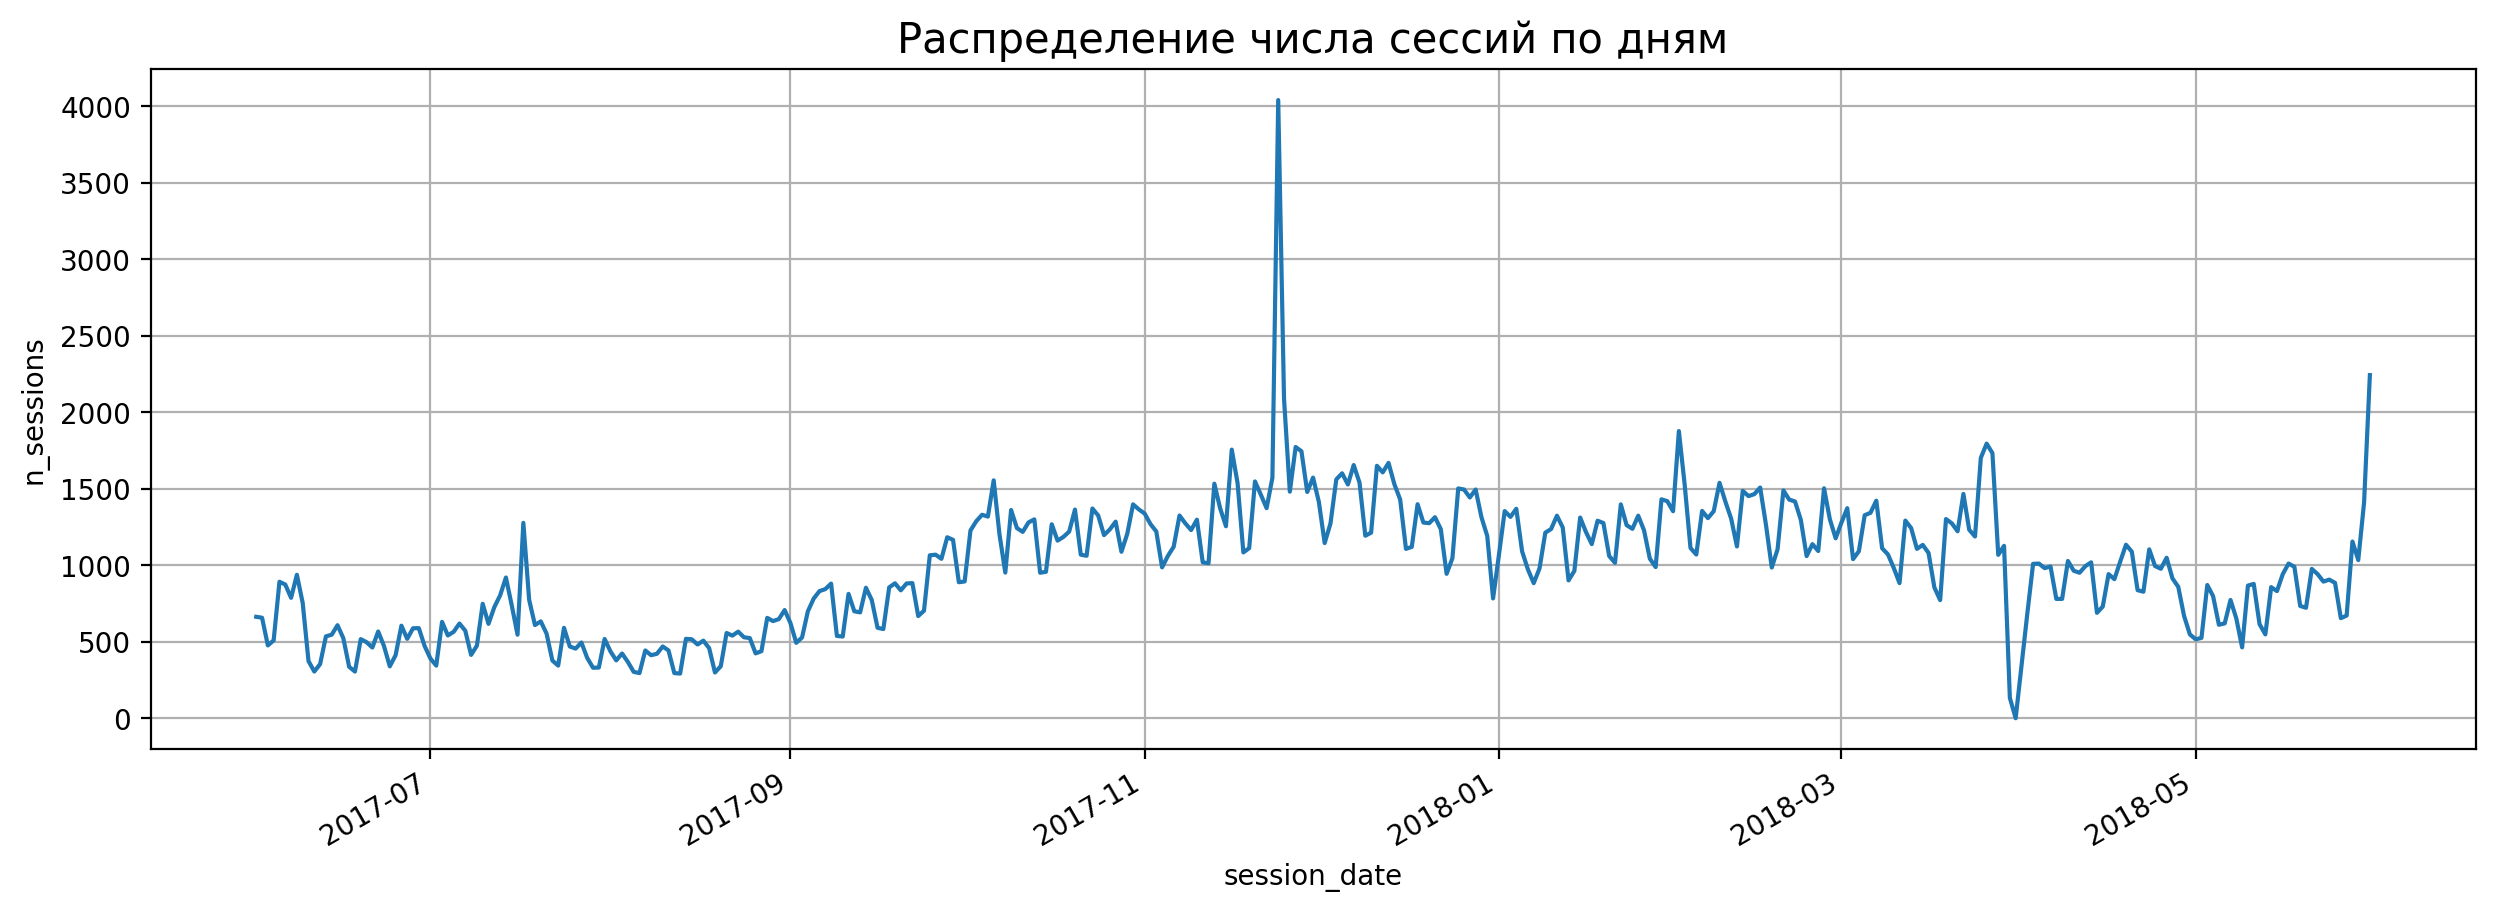

In [17]:

session_mean = visits.groupby('session_date').agg({'uid': ['count', 'nunique']}).reset_index()
session_mean.columns = ['session_date', 'n_sessions', 'n_users']

print ('Среднее число сессий в день:', session_mean['n_sessions'].mean().round(0))
# Построение графика:    
line_plot(session_mean, 'session_date', 'n_sessions', 'Распределение числа сессий по дням')

In [18]:
# Посмотрим на значения среднего числа сессий в зависимости от типа устройства:
sessions_count_by_devises = visits.groupby('device').agg({'session_date': 'nunique', 'uid': 'count'}).reset_index()
sessions_count_by_devises['session_count_mean'] = (sessions_count_by_devises['uid'] 
                                                   / sessions_count_by_devises['session_date']
                                                  ).round(0).astype('int')
display(sessions_count_by_devises)

device  session_date     uid  session_count_mean
0  desktop           364  262559                 721
1    touch           363   96829                 267

### Вывод:
- Среднее значение за весь период составляет 987 сессий / день. 
    - Незначительное отличие от среднего числа посететелей в день говорит о том, что небольшая часть пользователей (около 8.7%) повторно заходят на сайт в течение одного дня.
    - Именно поэтому график изменения кол-ва сессий в день с течением времени внешне не отличается от графика распределения DAU.
    - Что касается распределения среднего числа сессий в день в зависимости от устройства: с устройства "desktop" заходят в 2.7 раз чаще, что с "touch"

<a href='#content'>К содержанию</a>

#### <a id="step2.1.3"><a>2.1.3. Средняя продолжительность пользовательской сессии за весь период. Распределение средней продолжительности сессии по пользователям

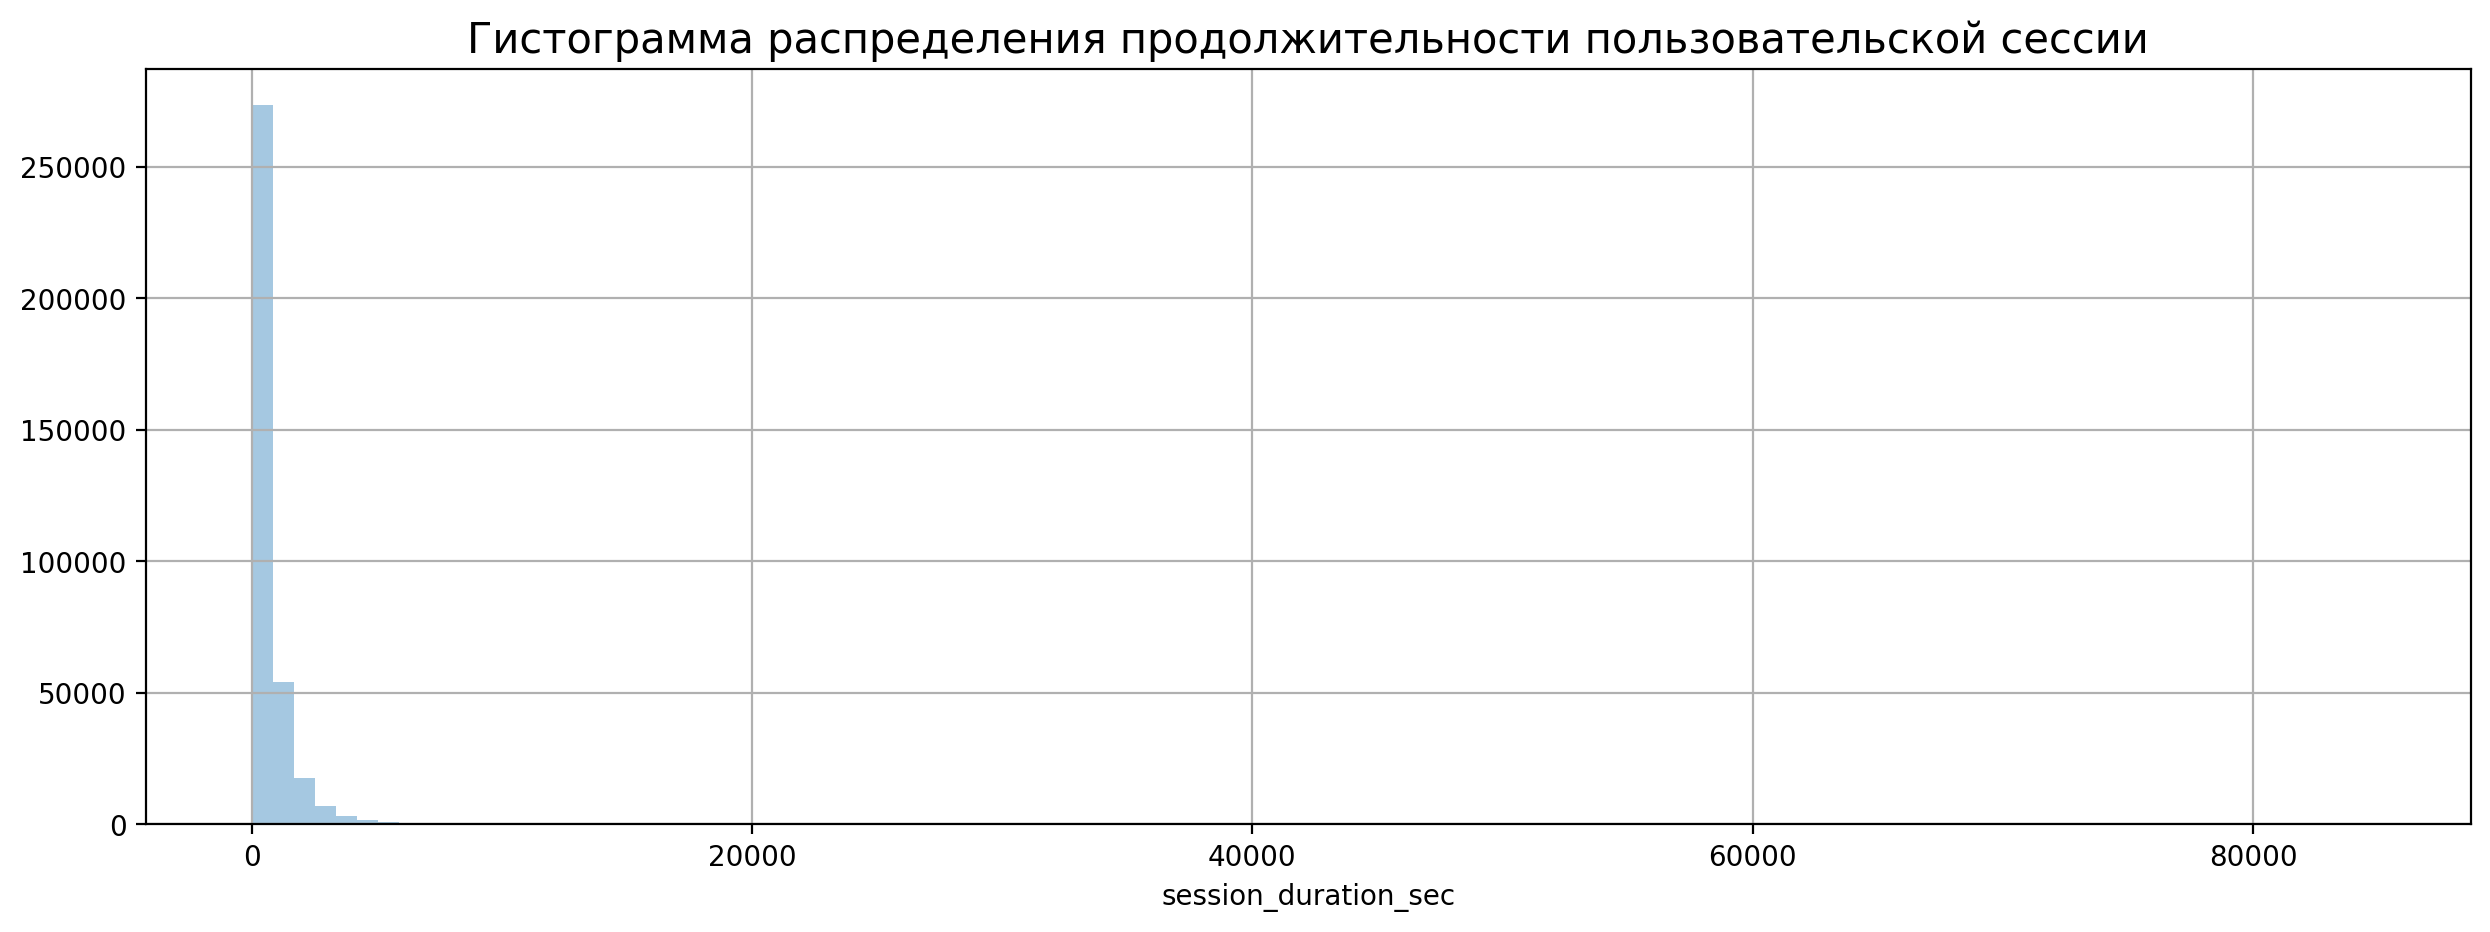

In [19]:
# Продолжительность сессии в секундах
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# Построение гистограммы распределения продолжительности пользовательской сессии:
plt.figure(figsize=(15, 5), dpi = 200)
ax = sns.distplot(visits['session_duration_sec'], bins=100, kde=False)
#plt.gcf().autofmt_xdate()
ax.set_title('Гистограмма распределения продолжительности пользовательской сессии', fontdict = {'fontsize': 15})
ax.grid()
plt.show()
plt.close()

In [20]:
# Проверим есть ли сессии с нулевой длительностью:
print ('Кол-во сессий с нулевой длительностью:',
       visits[visits['session_duration_sec'] == 0]['session_duration_sec'].count())
print ('Доля сессий с нулевой длительностью',
       (visits[visits['session_duration_sec'] == 0]['session_duration_sec'].count()) / visits.shape[0])

Кол-во сессий с нулевой длительностью: 35794
Доля сессий с нулевой длительностью 0.0995970928355983


In [21]:
# Для данного распределения рассчитывают моду вместо среднего значения:
print ('Наиболее часто встречающаяся продолжительность пользовательской сессии за весь период:',
       visits['session_duration_sec'].mode())
print ('Характеристики распределения продолжительности пользовательской сессии за весь период:')
display(visits['session_duration_sec'].describe())
print ('Характеристики распределения продолжительности пользовательской сессии')
print ('без учета сессий с нулевой длительностью за весь период:')
display(visits[visits['session_duration_sec'] != 0]['session_duration_sec'].describe())

Наиболее часто встречающаяся продолжительность пользовательской сессии за весь период: 0    60
dtype: int64
Характеристики распределения продолжительности пользовательской сессии за весь период:


count    359388.000000
mean        643.465703
std        1016.280993
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Характеристики распределения продолжительности пользовательской сессии
без учета сессий с нулевой длительностью за весь период:


count    323594.000000
mean        714.641965
std        1046.998928
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

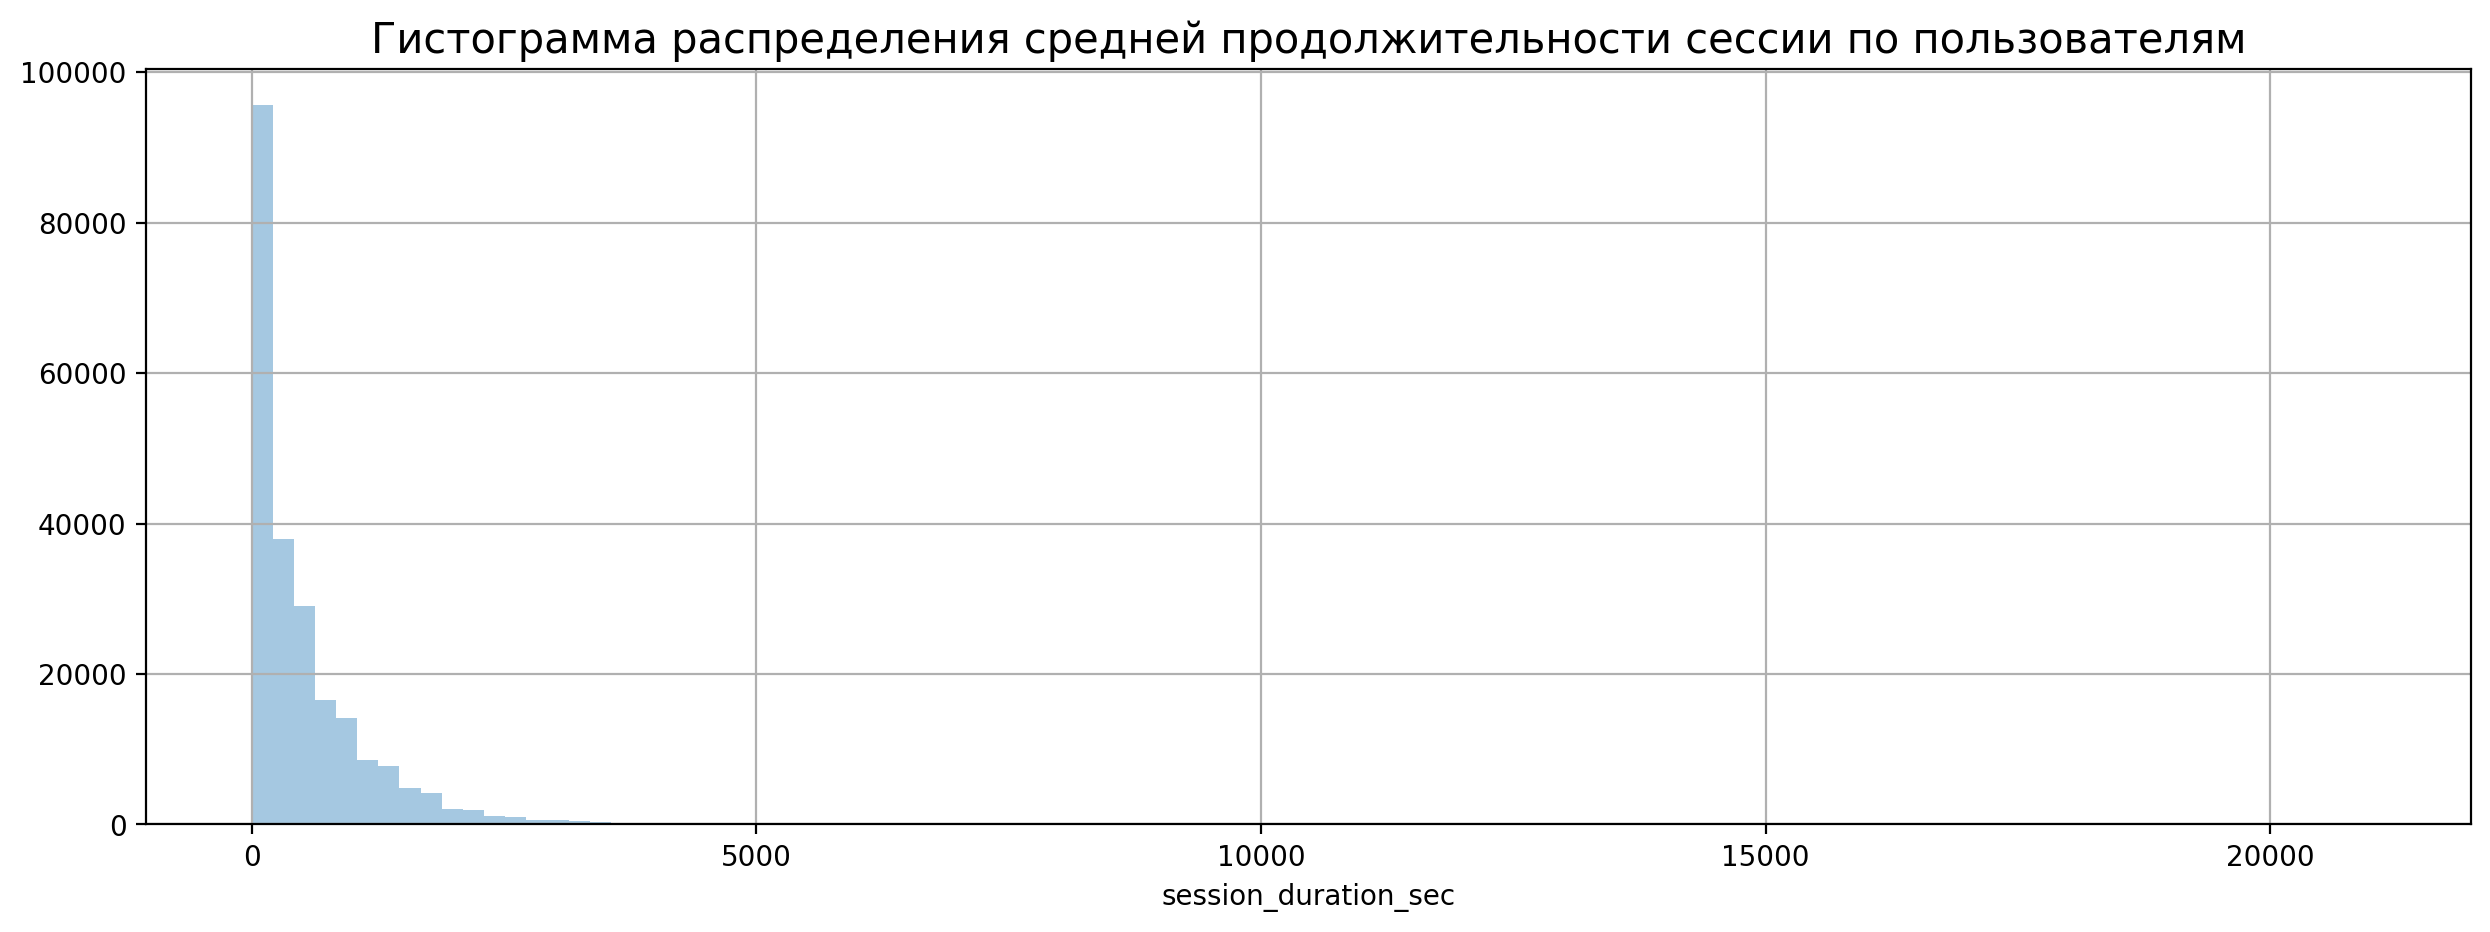

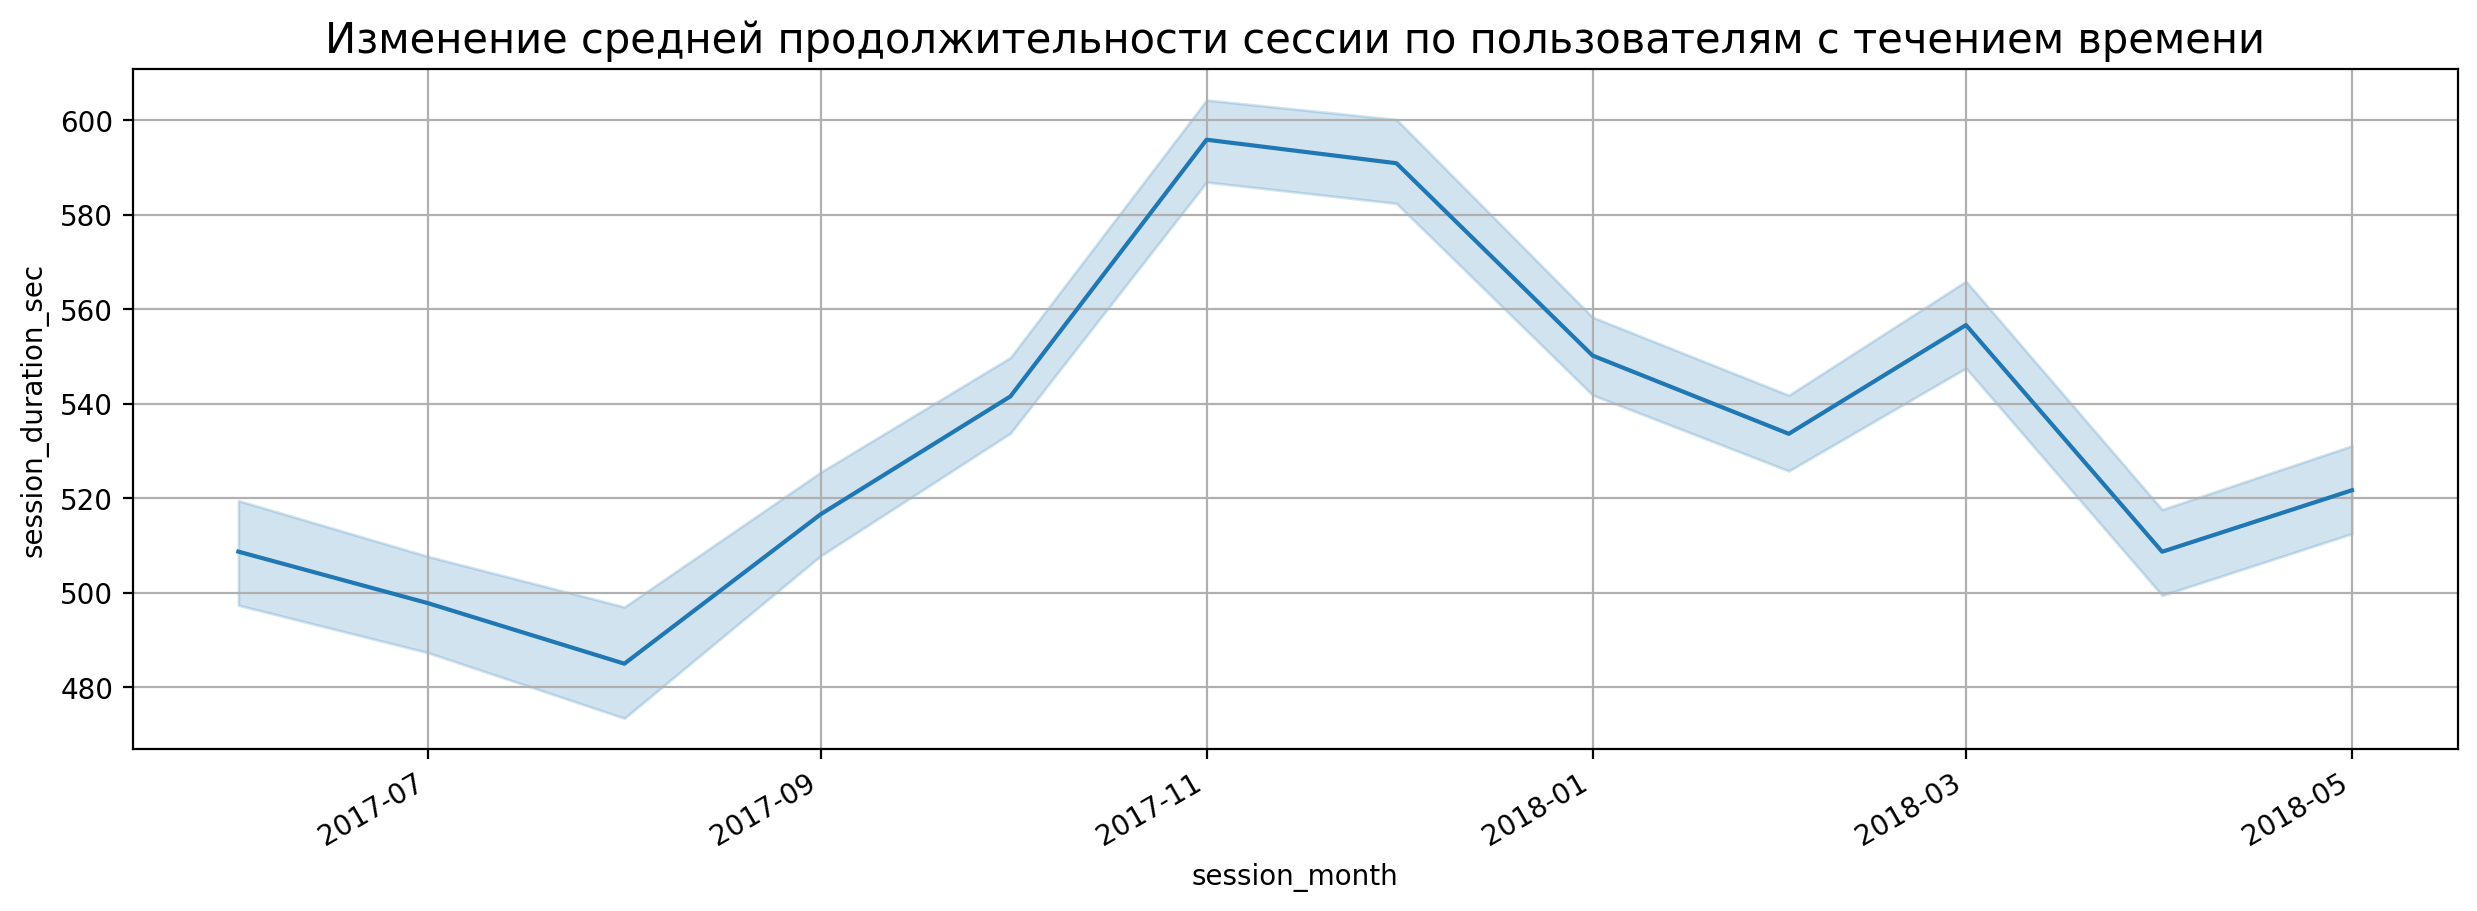

In [22]:
# Распределение средней продолжительности сессий по пользователям:
sessions_users = visits.groupby('uid').agg({'session_duration_sec': 'mean'})

# Построение гистограммы
plt.figure(figsize=(15, 5), dpi = 200)
ax = sns.distplot(sessions_users['session_duration_sec'], bins=100, kde=False)
#plt.gcf().autofmt_xdate()
ax.set_title('Гистограмма распределения средней продолжительности сессии по пользователям',
             fontdict = {'fontsize': 15})
ax.grid()
plt.show()
plt.close()

# Изменение средней продолжительности сессии по пользователям с течением времени:
sessions_users_by_month = visits.groupby(['session_month', 'uid']).agg({'session_duration_sec': 'mean'}).reset_index()
# Построение графика:
line_plot(sessions_users_by_month, 'session_month', 'session_duration_sec',
          'Изменение средней продолжительности сессии по пользователям с течением времени')


In [23]:
# Посмотрим на распределение продолжительности пользовательской сессии по устройствам:
session_duration_by_device = (visits
                              .groupby('device')
                              .agg({'session_duration_sec': 'mean'})
                              .round(0)
                              .astype('int')
                              .reset_index()
                             )
display(session_duration_by_device)

device  session_duration_sec
0  desktop                   704
1    touch                   480

### Вывод:
- Доля сессий с нулевой длительностью составляет около 10% - вероятно, 
- Наиболее часто втречающаяся продолжительность сессии 60 сек - данного времени вряд ли хватит для оформления заказа. Скорее всего, данные сессии носят ознакомительных характер.
- Рассчитанные средние значения за весь период с учетом и без учета сессий с нулевой длительностью составляют 643 и 715 сек, соответственно. За это время можно достаточно подробно ознакомится с представленными на сайте мероприятиями, а так же оформить заказ.
- По гистограмме и характеристикам распределения продолжительности сессий по пользователям можно сказать, что длительность половины сессий не превышает 5-6 минут, однако, встречаются и аномально долгие - максимальное значение = 84480 сек (примерно 23.5 часа)
- По изменению средней продолжительности сессий по пользователям с течением времени можно сказать, что форма графика очень близка к форме графика измениения числа пользователей по месяцам. Наблюдается небольшое падение в первые три месяца, затем значительный рост до максимального значения в последующие 3 месяца и уменьшение длительности сессии на оставшемся промежутке. 
- Средняя продолжительность пользовательской сессии с "desktop" примерно в 1.5 раза дольше, чем с "touch" и составляет почти 12 минут. Пользователи больше времени проводят на сайте, заходя с данного устройства, а значит больше вероятность совершения покупки.

<a href='#content'>К содержанию</a>

#### <a id="step2.1.4"><a>2.1.4. Расчет Retention Rate

In [24]:
# Series с первым месяцем посещения для каждого пользователя:
first_visit_by_user = visits.groupby(['uid'])['start_ts'].min()
first_visit_by_user.name = 'first_visit_month'
display(visits.groupby(['uid'])['start_ts'].count().describe())

count    228162.000000
mean          1.575144
std           4.646868
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         893.000000
Name: start_ts, dtype: float64

In [25]:
# Присоединение к общей таблице:
visits = visits.join(first_visit_by_user, on='uid')

In [26]:
# Изменение типа данных столбцов 'session_month' и 'first_visit_month':
#visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit_month'].astype('datetime64[M]')

In [27]:
# Вычисление значения 'cohort_lifetime':
visits['cohort_lifetime'] = visits['session_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 

# Получение таблицы "cohort_grouped" с группировкой по когортам и 'cohort_lifetime' и значением кол-ва пользователей:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

In [28]:
# Число пользователей, изначально бывших в каждой когорте:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
# Вывод таблицы:
display (initial_users_count)

first_visit_month  cohort_users
0         2017-06-01         13259
12        2017-07-01         13140
23        2017-08-01         10181
33        2017-09-01         16704
42        2017-10-01         25977
50        2017-11-01         27248
57        2017-12-01         25268
63        2018-01-01         22624
68        2018-02-01         22197
72        2018-03-01         20589
75        2018-04-01         15709
77        2018-05-01         15266

In [29]:
# Объединение данных:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')

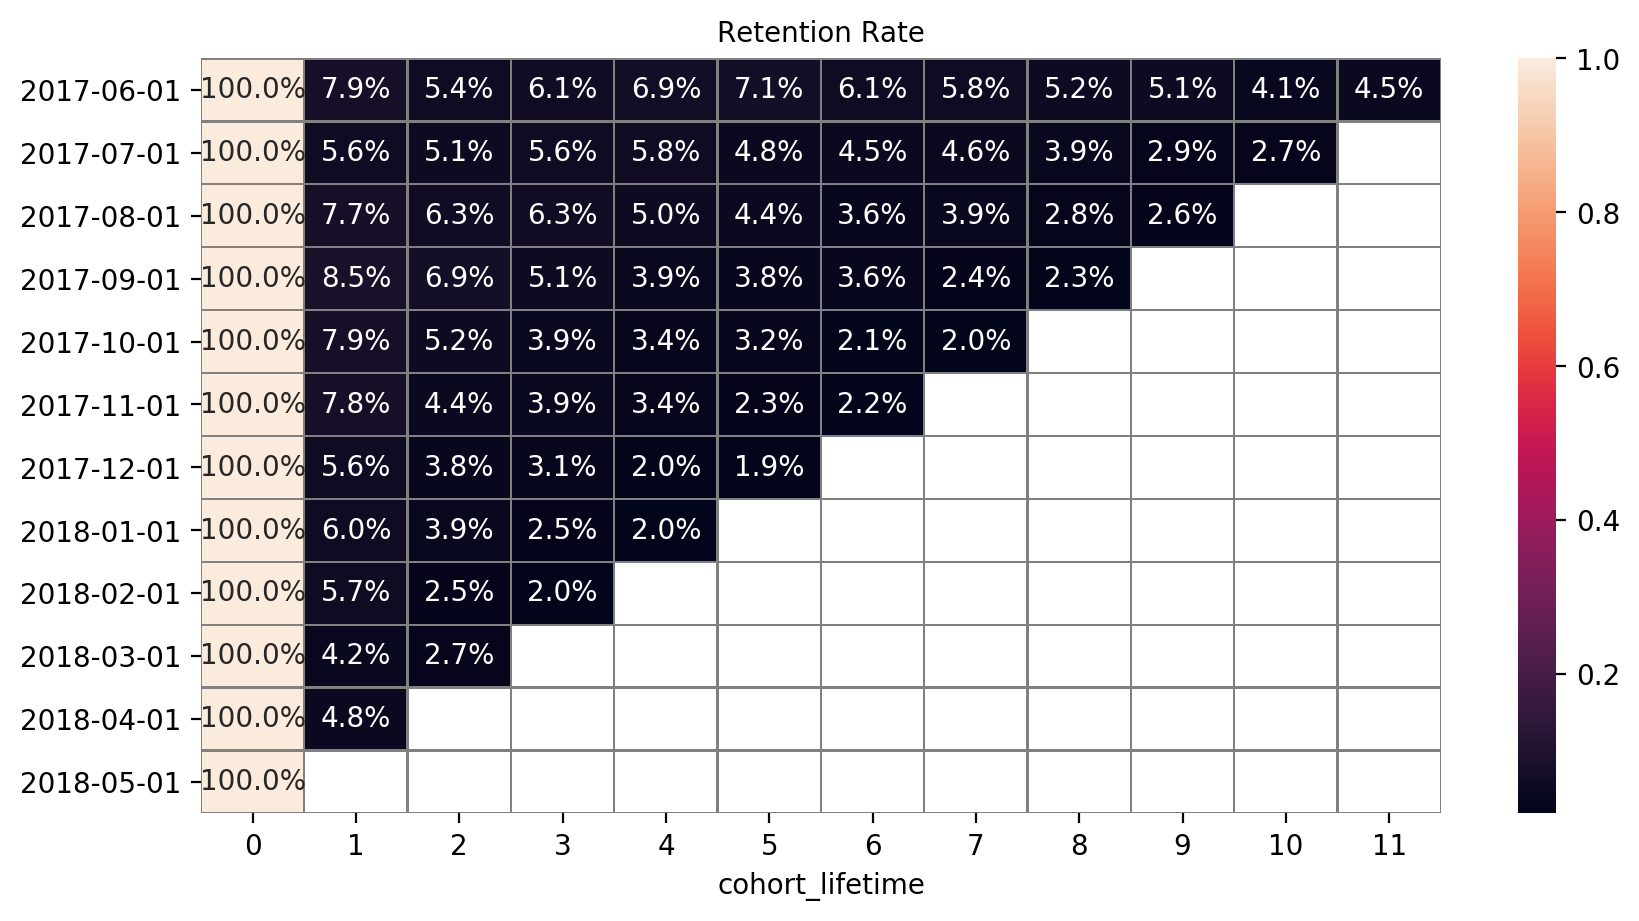

In [30]:
# Расчет Retention Rate:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Сводная таблица:
retention_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime',
                                      values='retention', aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime('%Y-%m-%d')

# Функция для построения тепловой карты:
def heatmap(data, title, fmt):
    plt.figure(figsize=(10, 5), dpi = 200)
    ax = sns.heatmap(data, linewidths=.5, linecolor='grey', annot=True, fmt=fmt)
    ax.set_title(title, fontdict = {'fontsize': 10})
    plt.show()
    plt.close()

# Построение тепловой карты для значений Retention Rate:
heatmap(retention_pivot, 'Retention Rate', '.1%')

### Вывод:
- Согласно тепловой карте распределения Retention Rate по когортам можно с точностью утверждать, что посетители редко возвращаются на сайт после первого месяца.
- Во втором месяце возвращаются 4.8% - 8.5% с дальнейшим стабильным падением показателя Retention Rate до 1.9%-4.8%
- Необходимо больше внимания уделять удержанию пользователей.

<a href='#content'>К содержанию</a>

### <a id="step2.2"><a>2.2. Метрики электронной коммерции

#### <a id="step2.2.1"><a>2.2.1. Расчет времени между первым посещением и покупкой

In [31]:
# Время первой покупки:
first_order_by_user = orders.groupby('uid')['buy_ts'].min()
first_order_by_user.name = 'first_order'
first_order_by_user = first_order_by_user.reset_index()


# Объединение таблиц:
timedelta_first_visit_order = first_order_by_user.merge(first_visit_by_user, on='uid')

timedelta_first_visit_order.head()

uid         first_order   first_visit_month
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00

count    36522.000000
mean     14950.285855
std      25784.804252
min          0.000000
25%        240.000000
50%        960.000000
75%      15120.000000
max      86340.000000
Name: timedelta, dtype: float64

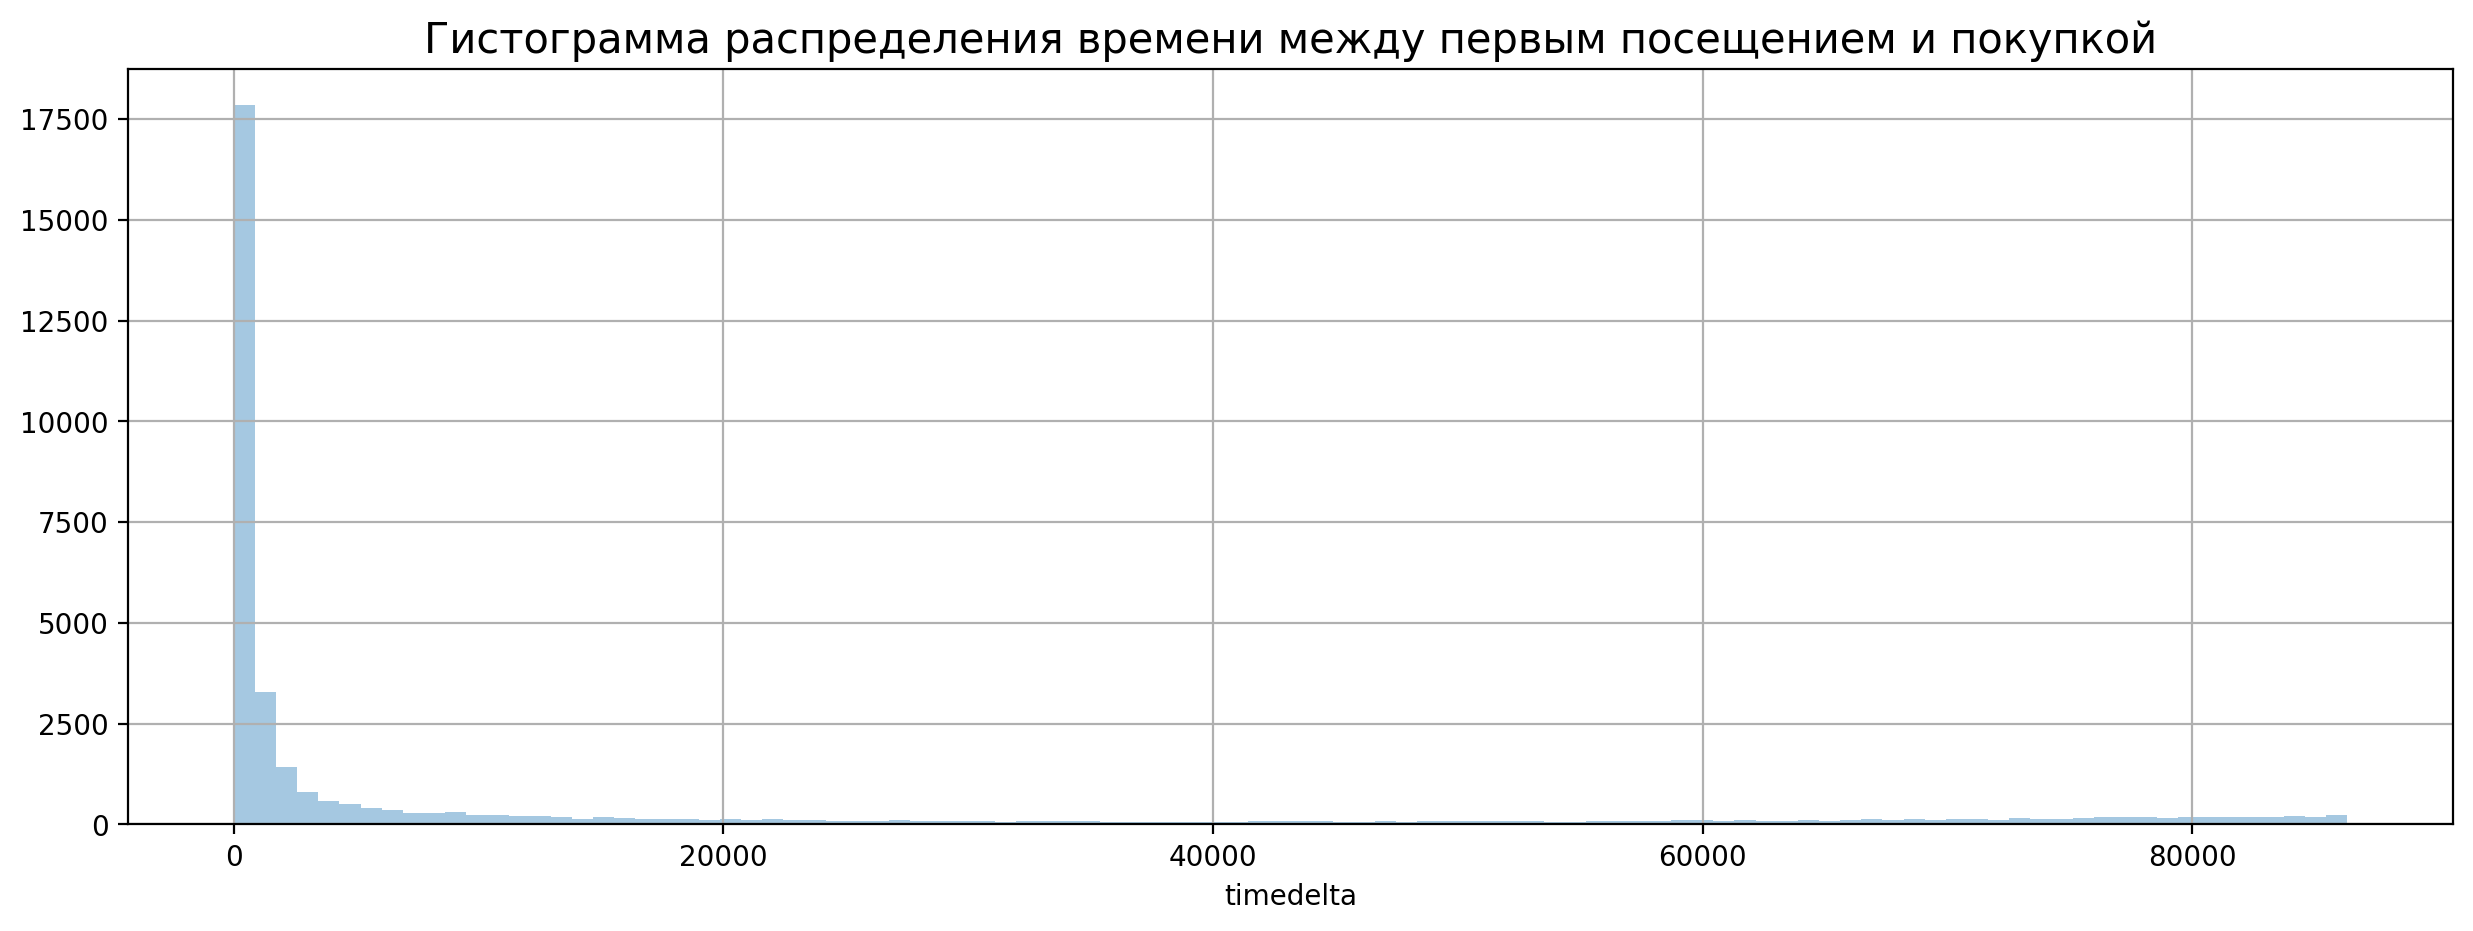

In [32]:
# Время между первым посещением и покупкой в сек:
timedelta_first_visit_order['timedelta'] = (timedelta_first_visit_order['first_order']
                                               - timedelta_first_visit_order['first_visit_month']
                                              ).dt.seconds
# Характеристики распределения времени между первым посещением и покупкой:
display(timedelta_first_visit_order['timedelta'].describe())

# Построение гистограммы
plt.figure(figsize=(15, 5), dpi = 200)
ax = sns.distplot(timedelta_first_visit_order['timedelta'], bins=100, kde=False)
#plt.gcf().autofmt_xdate()
ax.set_title('Гистограмма распределения времени между первым посещением и покупкой',
             fontdict = {'fontsize': 15})
ax.grid()
plt.show()
plt.close()


### Вывод:
- Согласно гистограмме и характеристикам распределения времени между первым посещением и первой покупкой можно сказать, что все покупки совершаются в течении первых суток после первого посещения.
- Половина заказов в течение первых 16 минут.
- По значению этого времени можно предположить, что многие покупатели заходят для покупки билетов на конкретное мероприятие и заранее знают о его проведении.

<a href='#content'>К содержанию</a>

#### <a id="step2.2.2"><a>2.2.2. Расчет среднеге количества покупок на одного клиента за 6 месяцев

In [33]:
# Объединение таблиц:
orders = orders.merge(first_order_by_user, on='uid')
# Вывод первых 5 строк:
orders.head()

buy_ts  revenue                   uid         first_order
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00

In [34]:
# Месяц первой покупки:
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
# Месяц покупки: 
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
# Определение lifetime когорты:
orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')
orders.head()

buy_ts  revenue                   uid         first_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month order_month  cohort_lifetime  
0        2017-06-01  2017-06-01                0  
1        2017-06-01  2017-06-01                0  
2        2017-06-01  2017-06-01                0  
3        2017-06-01  2017-06-01                0  
4        2017-06-01  2017-06-01                0

In [35]:
# Объединение покупателей в когорты по месяцу первой покупки:
cohort_orders = (orders
                 .groupby(['first_order_month', 'cohort_lifetime'],as_index=False)
                 .agg({'uid':('count', 'nunique'), 'revenue': 'sum'})
                )
# Изменение названий столбцов:
cohort_orders.columns = ['first_order_month', 'cohort_lifetime', 'n_orders', 'n_users', 'revenue']
# Вывод первых 5 строк полученной таблицы:
display(cohort_orders.head())

first_order_month  cohort_lifetime  n_orders  n_users  revenue
0        2017-06-01                0      2354     2023  9557.49
1        2017-06-01                1       177       61   981.82
2        2017-06-01                2       174       50   885.34
3        2017-06-01                3       226       54  1931.30
4        2017-06-01                4       292       88  2068.58

In [36]:
# Количество пользователей всех когорт:
cohort_orders_users = cohort_orders[cohort_orders['cohort_lifetime'] == 0][['first_order_month', 'n_users']]
cohort_orders_users = cohort_orders_users.rename(columns={'n_users': 'init_users'})

# Series когорт с lifetime >=5
six_month_cohorts = cohort_orders[cohort_orders['cohort_lifetime'] == 5]['first_order_month']

# Таблица с суммарными заказами для когорт из "six_month_cohorts" за 6 месяцев
output = (cohort_orders[cohort_orders['first_order_month'].isin(six_month_cohorts)]
          .pivot_table(index='first_order_month', columns='cohort_lifetime', values='n_orders',aggfunc='sum')
          .cumsum(axis=1)[5].reset_index()
         )

# Изменение названий столбцов
output.columns = ['first_order_month', 'total_orders']

# Объединение таблиц
six_month_orders_users = (cohort_orders_users[cohort_orders_users['first_order_month'].isin(six_month_cohorts)]
                       .merge(output, on='first_order_month')
                      )
# Среднее значение кол-ва покупок на одного клиента за 6 мес по когортам:
six_month_orders_users['mean_orders'] = (six_month_orders_users['total_orders'] 
                                         / six_month_orders_users['init_users']).round(2)

# Вывод итоговой таблицы
display(six_month_orders_users)

first_order_month  init_users  total_orders  mean_orders
0        2017-06-01        2023        3441.0         1.70
1        2017-07-01        1923        2664.0         1.39
2        2017-08-01        1370        1969.0         1.44
3        2017-09-01        2581        3653.0         1.42
4        2017-10-01        4340        5794.0         1.34
5        2017-11-01        4081        5798.0         1.42
6        2017-12-01        4383        5894.0         1.34

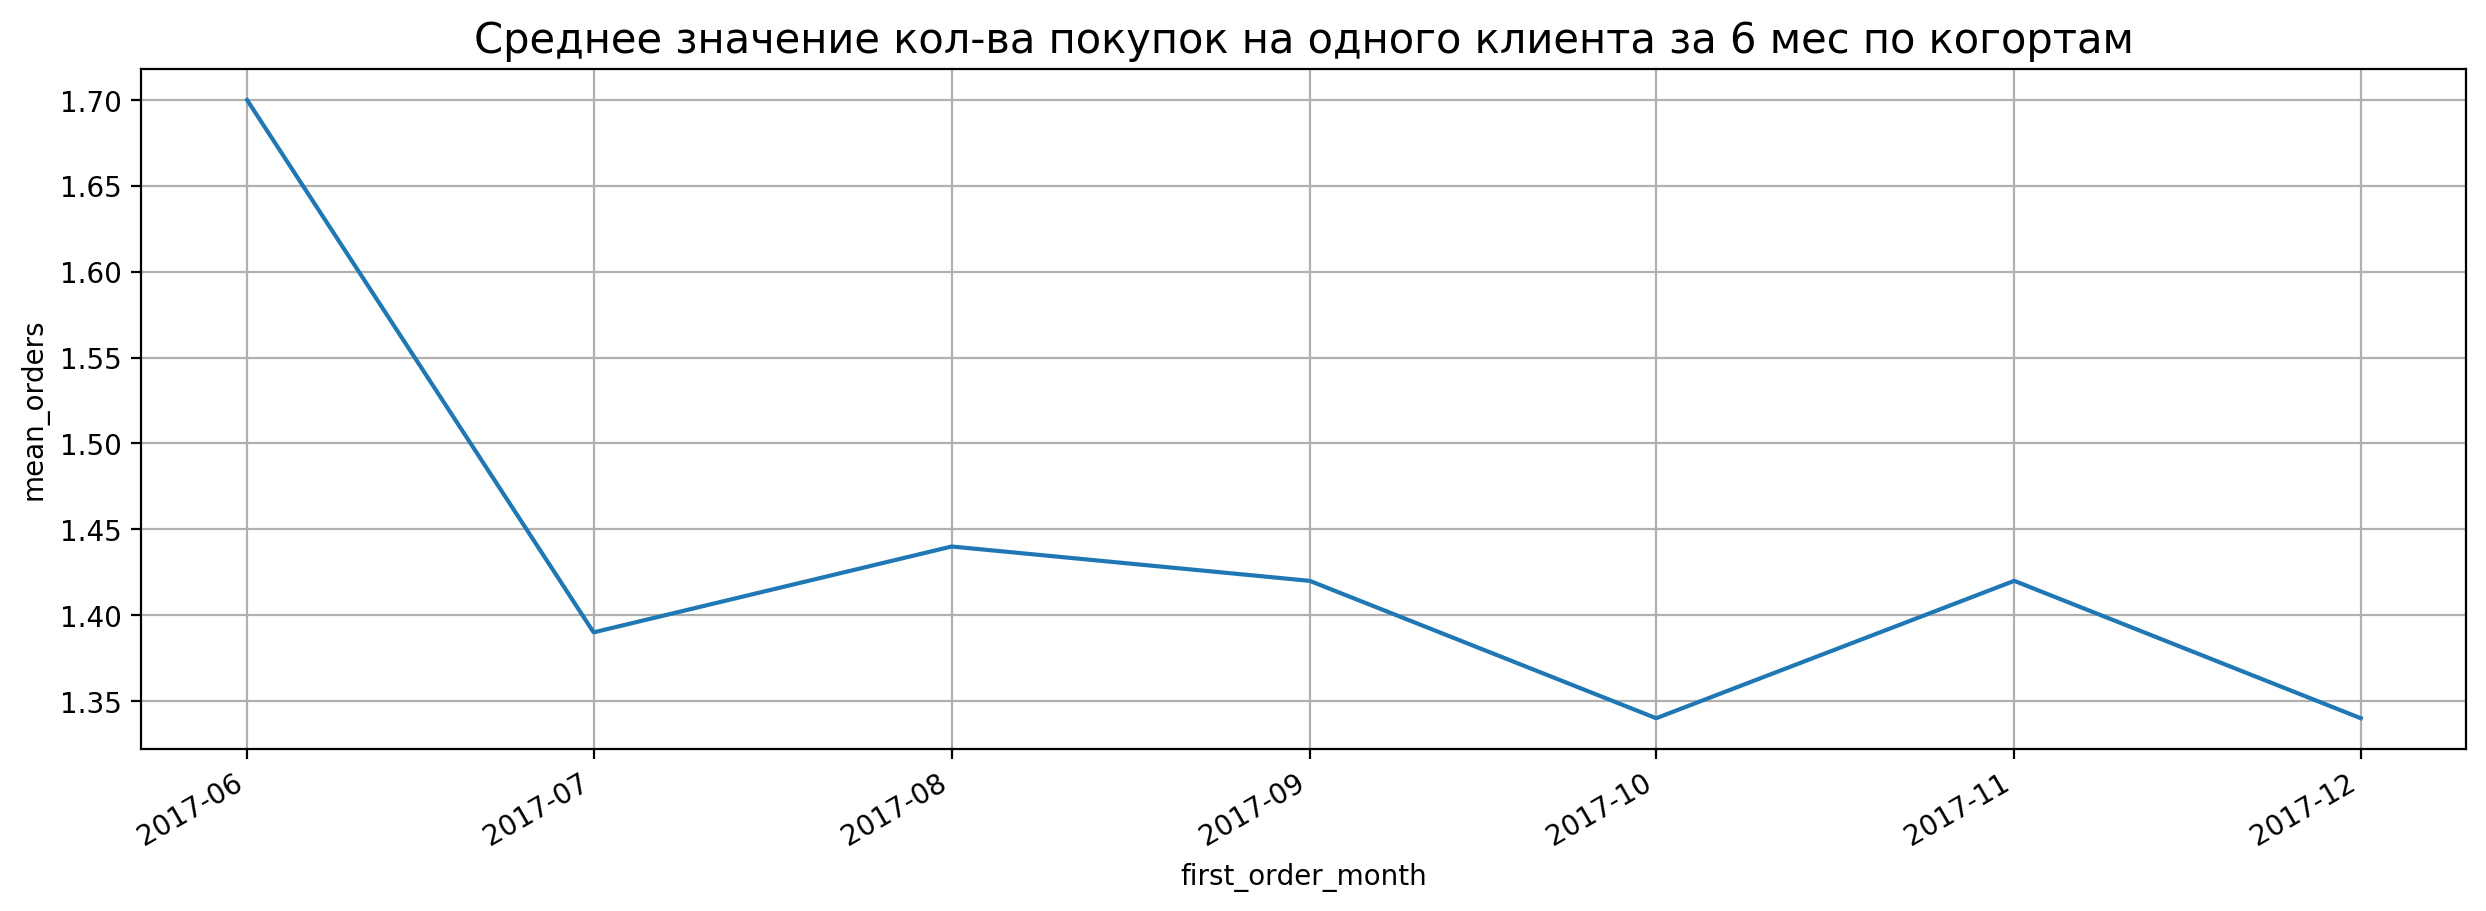

Среднее значение кол-ва покупок на одного клиента: 1.44


In [37]:
line_plot(six_month_orders_users, 'first_order_month', 'mean_orders',
          'Среднее значение кол-ва покупок на одного клиента за 6 мес по когортам')

# Среднее значение кол-ва покупок на одного клиента:
print('Среднее значение кол-ва покупок на одного клиента:', six_month_orders_users['mean_orders'].mean().round(2))

### Вывод:
- Из полученных значений можно сказать, что среднее значение количества покупок пользователей первой когорты, которое составляет 1.7, отличается от значений остальных когорт, которые лежат в диапазоне от 1.34 до 1.44.
- Для примерной оценки данных значений можно представить, что если клиент совершает либо одну, либо две покупки, то тогда, при среднем значении числа покупок на одного клиента 1.7, 3 человека из 10 делают заказы всего один раз, а остальные 7 по 2 раза. Для значений 1.34 - 1.44 получаем, что из 10 клиентов уже всего 3-4 человека совершают по две покупки.
- Однако, исходя из значений Retention Rate, полученных ранее, можно сделать предположение, что большая часть заказов приходится на первый месяц, т.е. при cohort_lifetime =0. Причем данные заказы единичные - имеется ввиду, что пользователь совершил одну покупку и больше никогда не аозвращался и лишь очень небольшая часть покупателей регулярно возвращаются и делают повторные заказы.

<a href='#content'>К содержанию</a>

#### <a id="step2.2.3"><a>2.2.3. Средняя выручка с пользователя

In [38]:
print ('Суммарная выручка за весь период:', orders['revenue'].sum().round(2))

Суммарная выручка за весь период: 252053.78


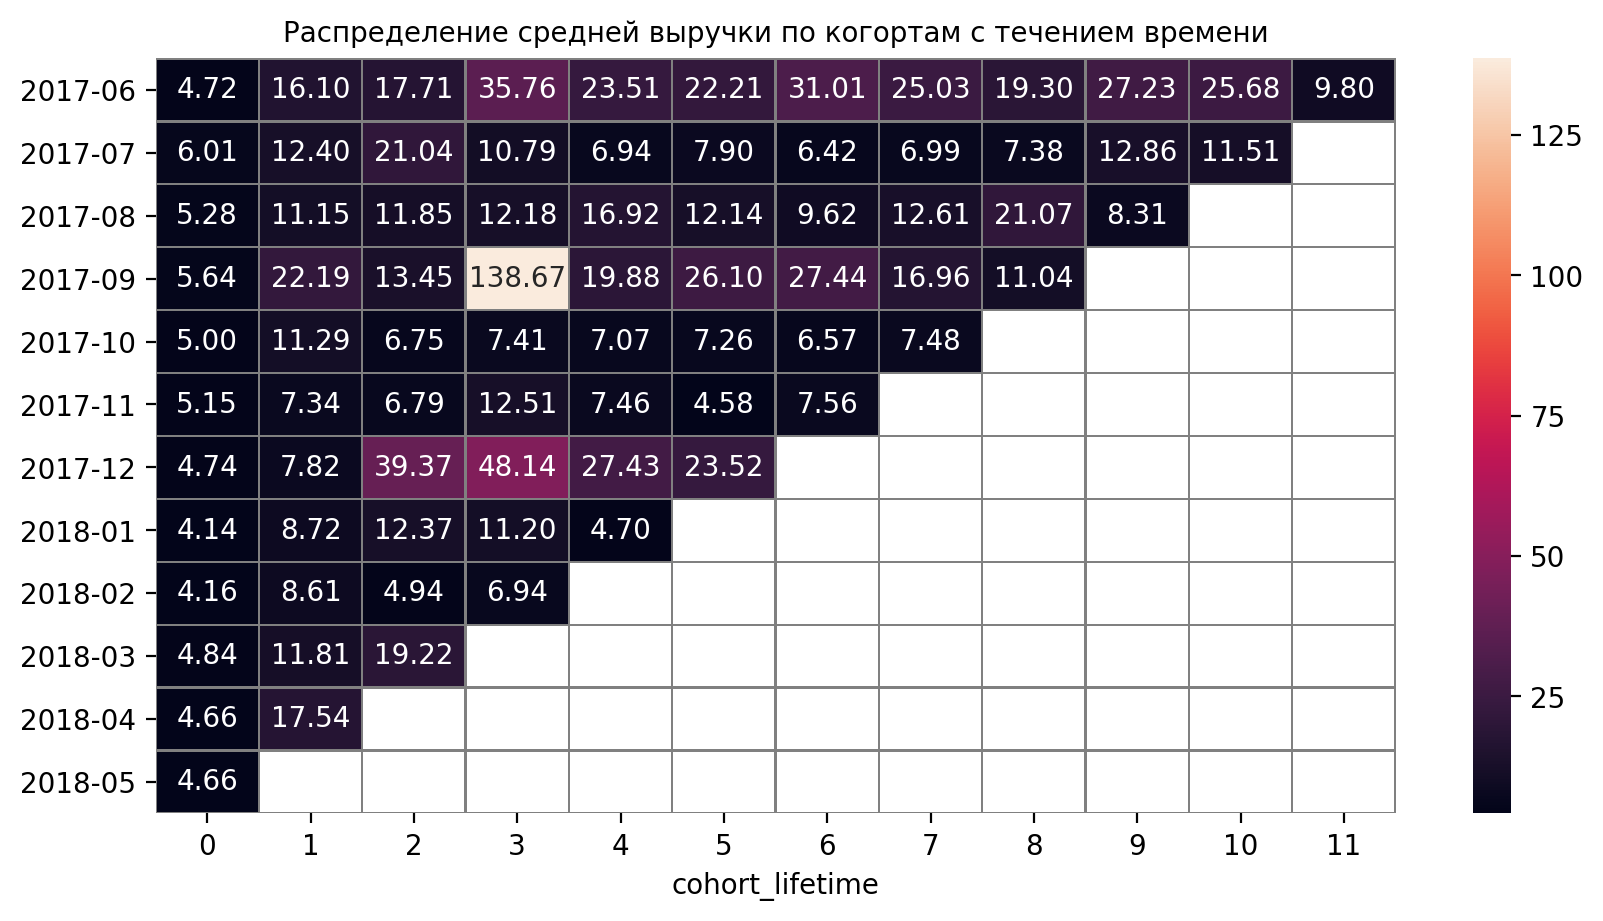

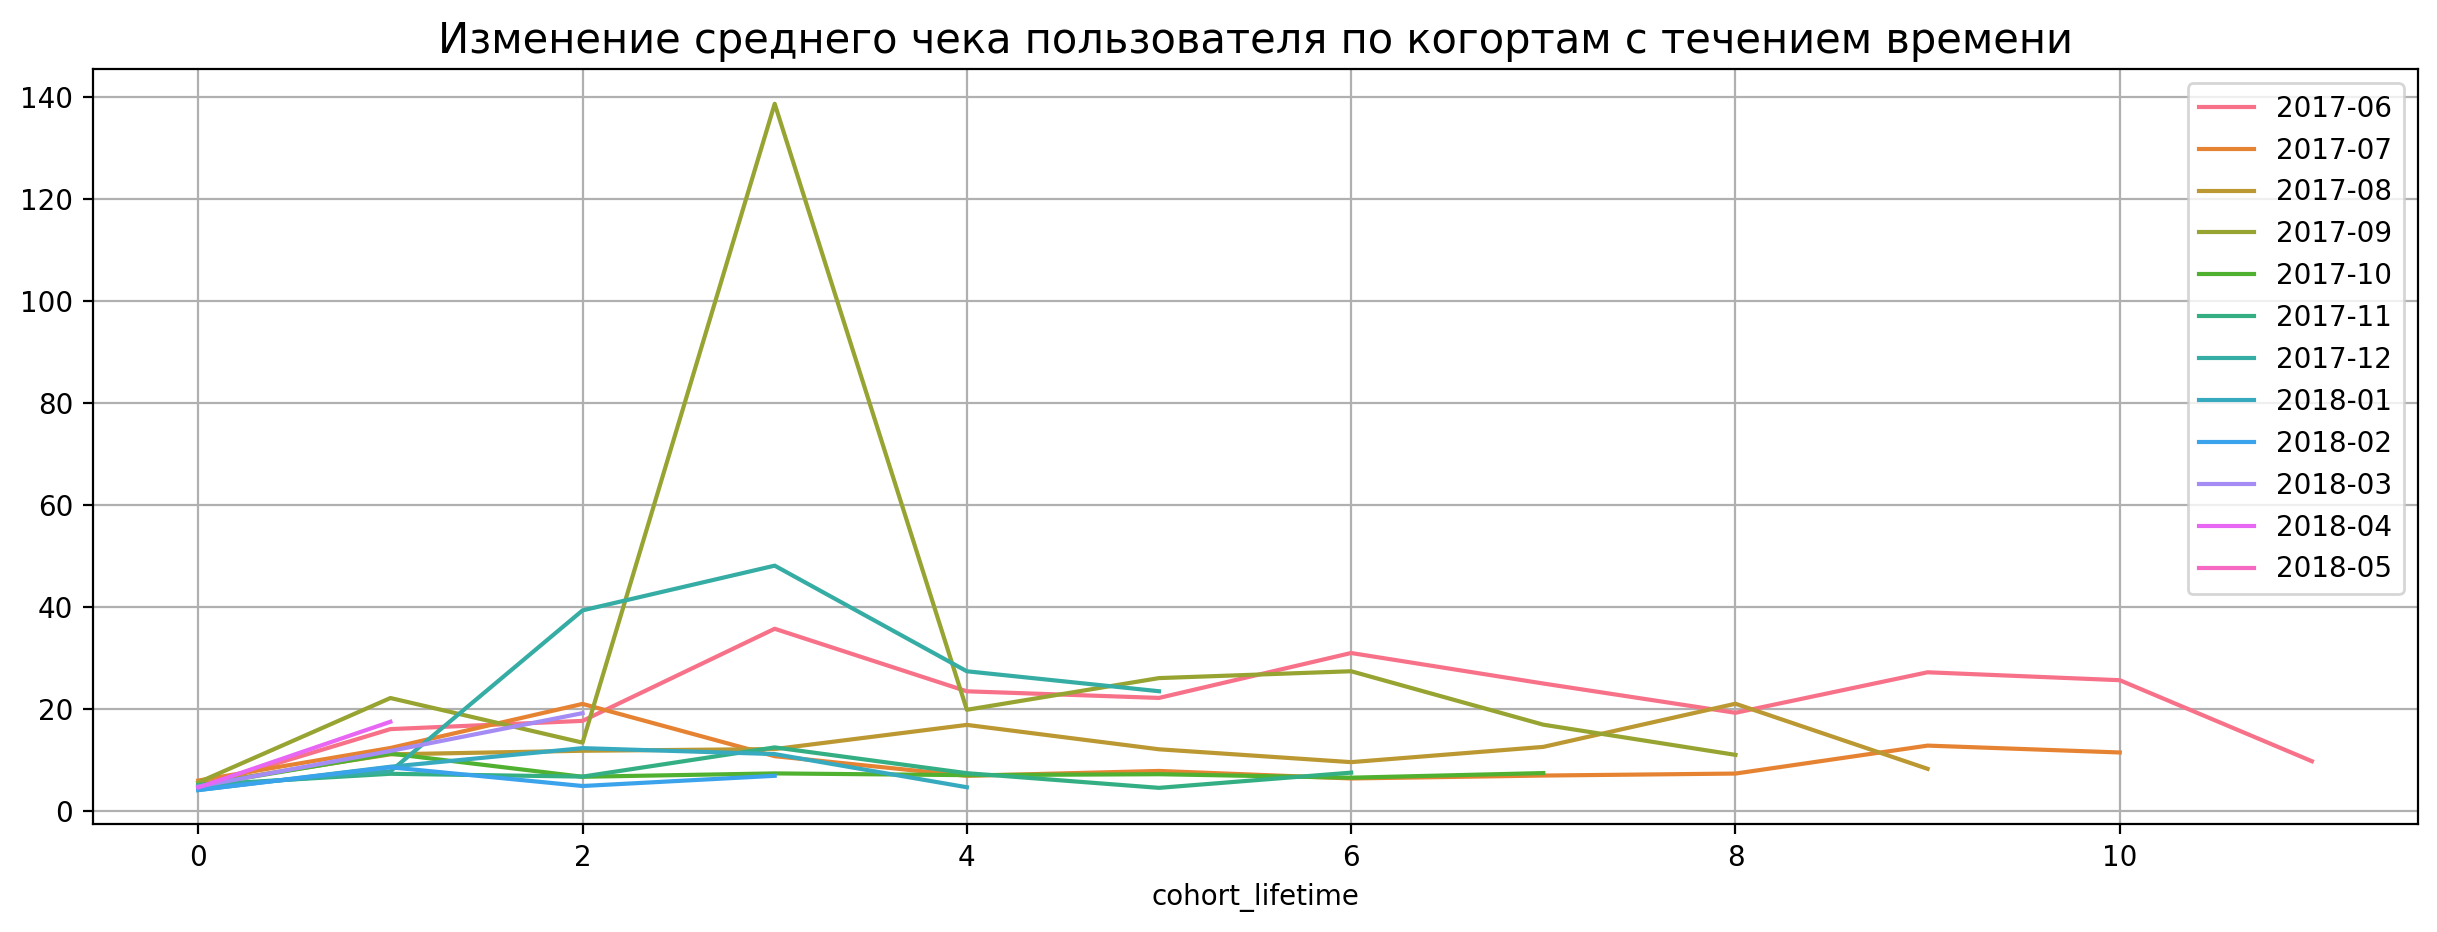

In [39]:
# Расчет средней выручки с пользователя:
cohort_orders['revenue_per_user'] = cohort_orders['revenue'] / cohort_orders['n_users']
# Сводная таблица
revenue_per_user_by_cohorts = (cohort_orders
                               .pivot_table(index='first_order_month', columns='cohort_lifetime', 
                                            values='revenue_per_user', aggfunc='mean') 
                              )
revenue_per_user_by_cohorts.index = revenue_per_user_by_cohorts.index.strftime('%Y-%m')

# Тепловая карта изменения средней выручки по когортам с течением времени
heatmap(revenue_per_user_by_cohorts, 'Распределение средней выручки по когортам с течением времени', '.2f')

plt.figure(figsize=(15, 5), dpi = 200)
sns.color_palette()
ax = sns.lineplot(data=revenue_per_user_by_cohorts.T, dashes=False)
#plt.gcf().autofmt_xdate()
ax.set_title('Изменение среднего чека пользователя по когортам с течением времени',
             fontdict = {'fontsize': 15})
ax.grid()
plt.show()
plt.close()

### Вывод:
- По полученным результатам можно сказать, что средний чек в первый месяц жизни когорты по всем когортам находится примерно на одном уровне.
- Интересно отметить, что по всем когортам значение среднего чека первое время растет, а затем несколько падает и выходит на определенный уровень, свой для каждой когорты. Так же, за исключением одного случая, средний чек с течением времени остается больше превоначального значения.
- При учете малого значения Retention Rate, можно сделать вывод, что та небольшая часть пользователей, которая все таки возвращается на сайт в последующие месяцы, с течением времени совершает более крупный покупки.
- Особое внимание следует уделить аномально высокому среднему чеку когорты "2017-09" при cohort_lifetime = 3, т.е. в декабре 2017 г. Можно предположить, что высокий средный чек в декабре связан с большим количеством новогодних представлений, билеты на которые покупаются. Тогда возникает вопрос: почему только в этой когорте наблюдается такое значение? Опять же можно предположить, что часть пользователей данной когорты - родители детей или, например, студенты, которые впервые зашли на сайт в начале учебного года.

<a href='#content'>К содержанию</a>

#### <a id="step2.2.4"><a>2.2.4. Изменение во времени накопительного LTV по когортам. Сравнение среднего LTV по когортам за 6 месяцев

Необходимо оценить когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

In [40]:
# Объединение таблиц:
report = cohort_orders.reset_index().merge(cohort_orders_users, on='first_order_month')
report.head()

index first_order_month  cohort_lifetime  n_orders  n_users  revenue  \
0      0        2017-06-01                0      2354     2023  9557.49   
1      1        2017-06-01                1       177       61   981.82   
2      2        2017-06-01                2       174       50   885.34   
3      3        2017-06-01                3       226       54  1931.30   
4      4        2017-06-01                4       292       88  2068.58   

   revenue_per_user  init_users  
0          4.724414        2023  
1         16.095410        2023  
2         17.706800        2023  
3         35.764815        2023  
4         23.506591        2023

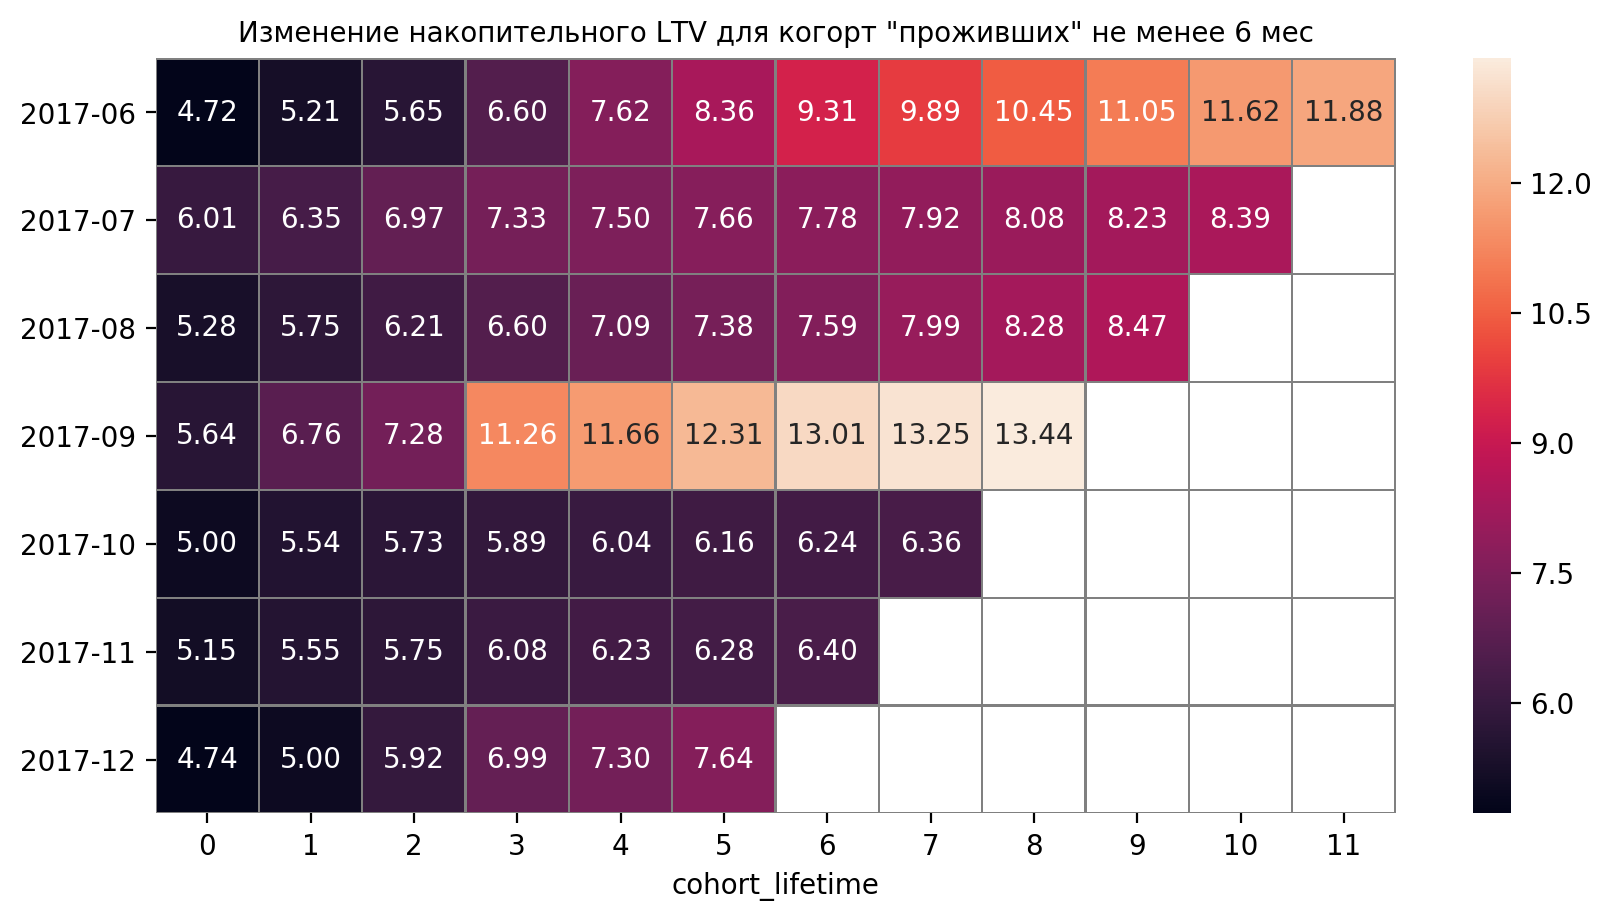

In [41]:
# Т.к. маржинальность сервиса - 100%, то выручка "revenue" и есть валовая прибыль
# Расчет LTV
report['ltv'] = report['revenue'] / report['init_users']

# По результатам предыдущих заданий есть список с когортами, прожившими не менее 6 мес - "six_month_cohorts"
# А так же размеры данных когорт - "cohort_orders_users"
output = (report[report['first_order_month'].isin(six_month_cohorts)]
          .pivot_table(index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean')
         )


output.index = output.index.strftime('%Y-%m')
heatmap(output.cumsum(axis=1), 'Изменение накопительного LTV для когорт "проживших" не менее 6 мес', '.2f')

first_order_month  ltv_0  ltv_5  delta_ltv
0           2017-06   4.72   8.36       3.64
1           2017-07   6.01   7.66       1.65
2           2017-08   5.28   7.38       2.10
3           2017-09   5.64  12.31       6.67
4           2017-10   5.00   6.16       1.16
5           2017-11   5.15   6.28       1.13
6           2017-12   4.74   7.64       2.90

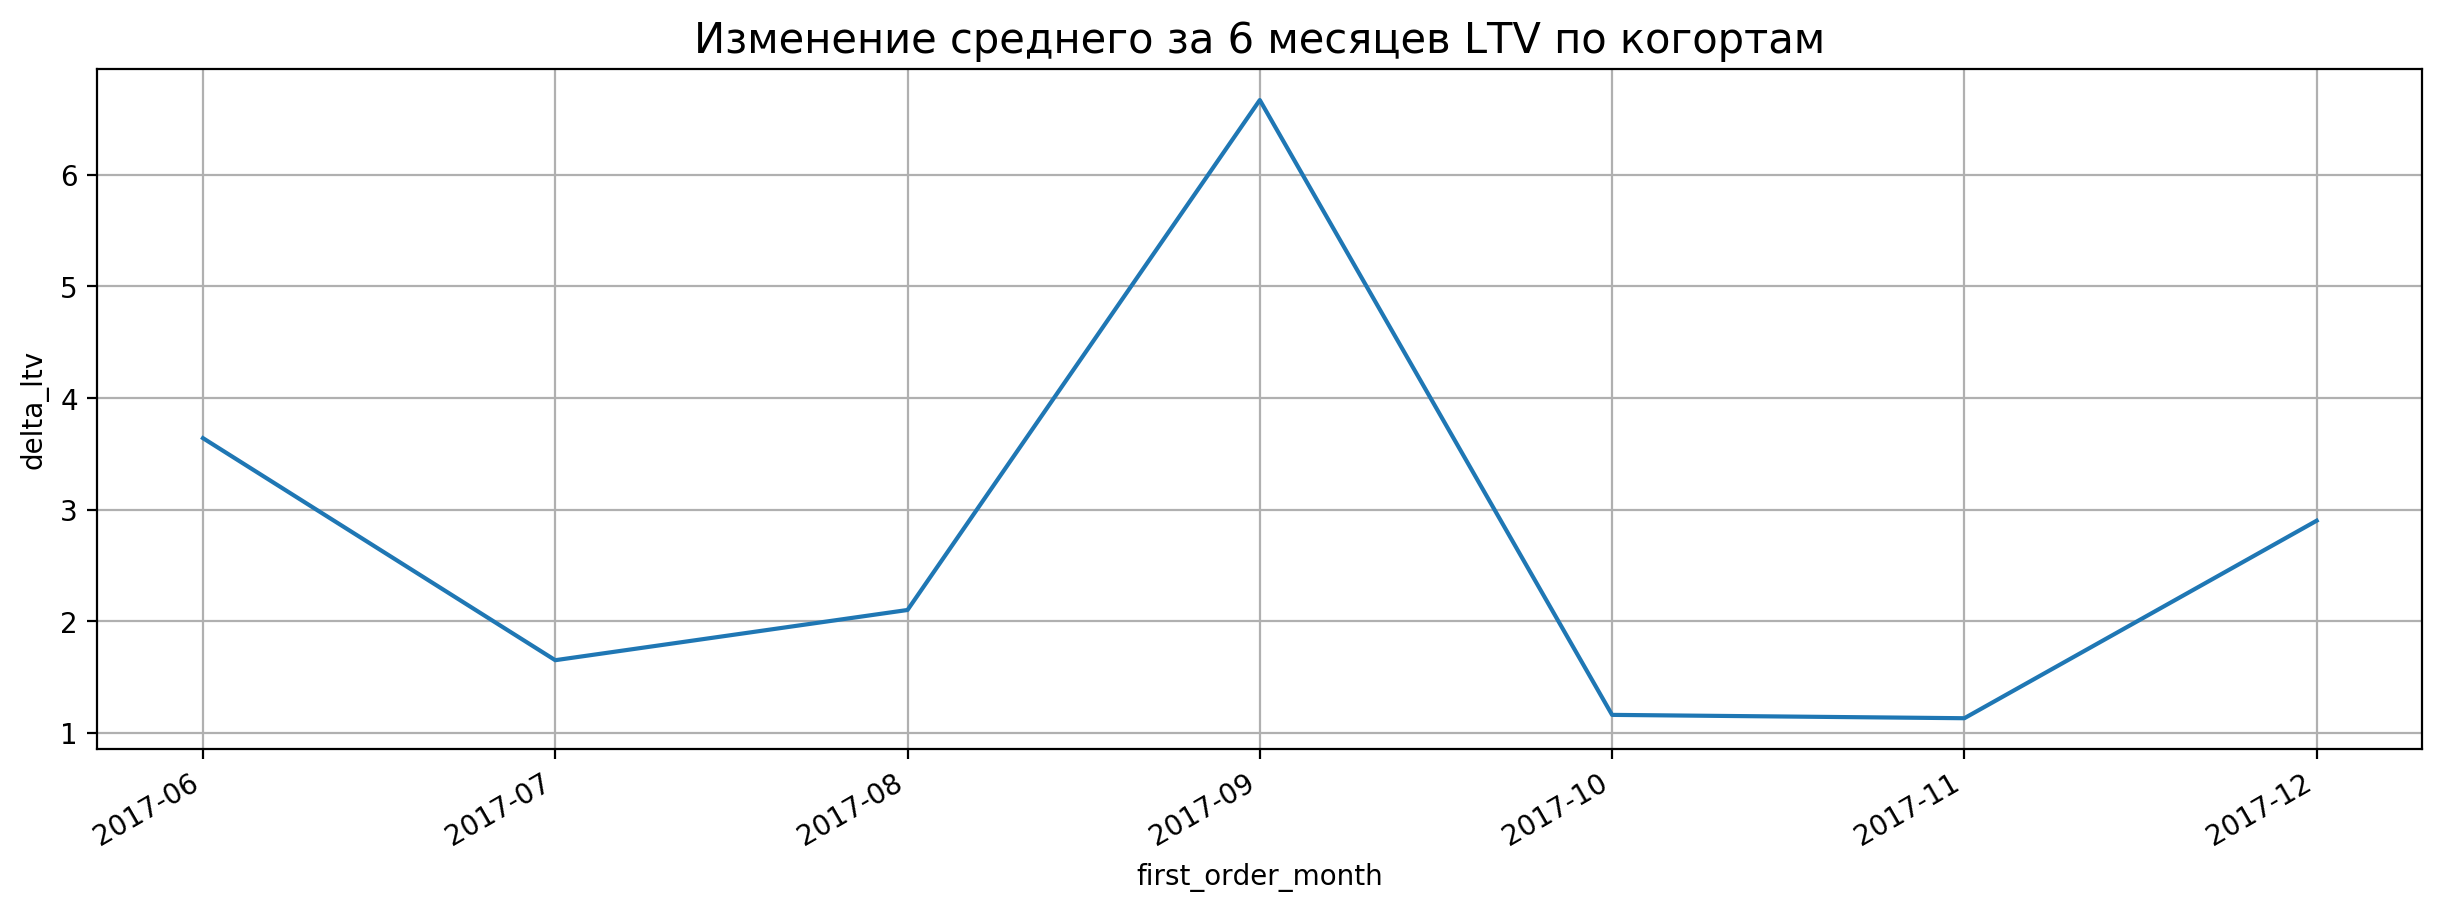

In [42]:
six_month_ltv = output[0].round(2).reset_index()
six_month_ltv = six_month_ltv.merge(output.cumsum(axis=1)[5].round(2).reset_index(), on='index')

six_month_ltv.columns = ['first_order_month', 'ltv_0', 'ltv_5']
six_month_ltv['delta_ltv'] = six_month_ltv['ltv_5'] - six_month_ltv['ltv_0']
display(six_month_ltv)
line_plot(six_month_ltv, 'first_order_month', 'delta_ltv', 'Изменение среднего за 6 месяцев LTV по когортам')

### Вывод:
- По тепловой карте значений накопительного LTV можно сказать, что первоначально LTV по всем когортам находится примерно на одном уровне - разброс значений относительно небольшой: 4.72 - 6.01.
- Далее, с течением времени, значение начинает расти (что ожидаемо), однако темпы роста (накопления) для разных когорт несколько отличаются.
- Разброс значений по прошествии 6 месяцев уже более значительный: 6.28 - 12.31. Значение 12.31 соответствует, упомянутой выше, когорте "2017-09" с аномально высоким средним чеком в декабре, именно в этом месяце и наблюдается значительный прирост значения LTV.
- Если не учитывать данное значение разброс значений уже не такой большой 6.28 - 8.36.
- Поэтому логичнее посмотреть на прирост значений по каждлй когорте: для некоторых когорт прирост составляет всего 1.13, тогда как максимальный, для когорты "2017-09" - 6.67, следующий за ним по величине прирост у первой когорты "2017-06" - 3.64


<a href='#content'>К содержанию</a>

### <a id="step2.3"><a>2.3. Маркетинговые метрики

#### <a id="step2.3.1"><a>2.3.1. Общая сумма расходов на маркетинг. Распределение трат по источникам и изменение во времени

In [43]:
print ('Общая сумма расходов за весь период:', costs['costs'].sum())

Общая сумма расходов за весь период: 329131.62


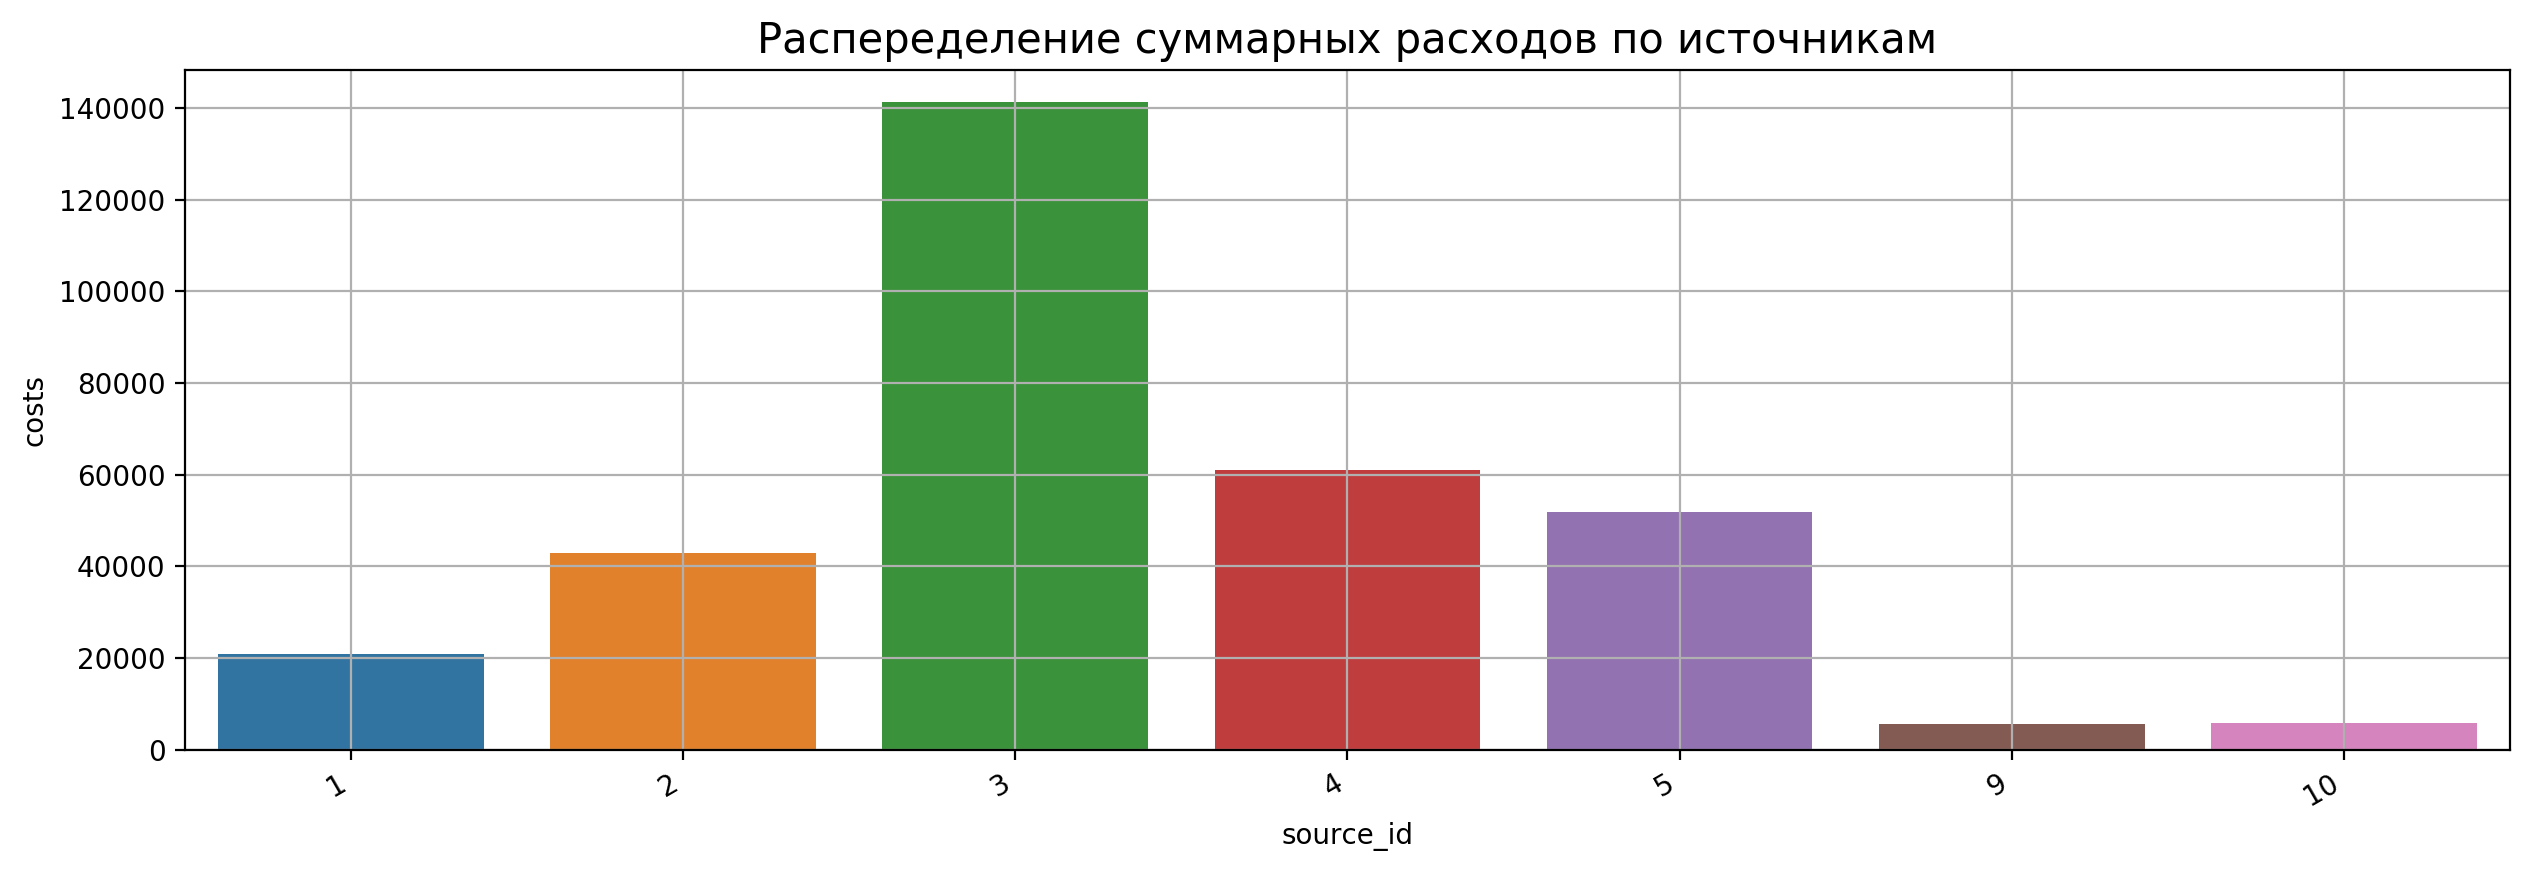

In [44]:
# Группируем расходы по источникам трафика:
costs_grouped_by_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

# Функция для построения столбчатой диаграммы:
def barplot(data, x_name, y_name, title):
    plt.figure(figsize=(15, 5), dpi = 200)
    ax = sns.barplot(data=data, x=x_name, y=y_name)
    plt.gcf().autofmt_xdate()
    ax.set_title(title, fontdict = {'fontsize': 15})
    ax.grid()
    plt.show()
    plt.close()

# Построение графика:
barplot(costs_grouped_by_source, 'source_id', 'costs', 'Распеределение суммарных расходов по источникам')

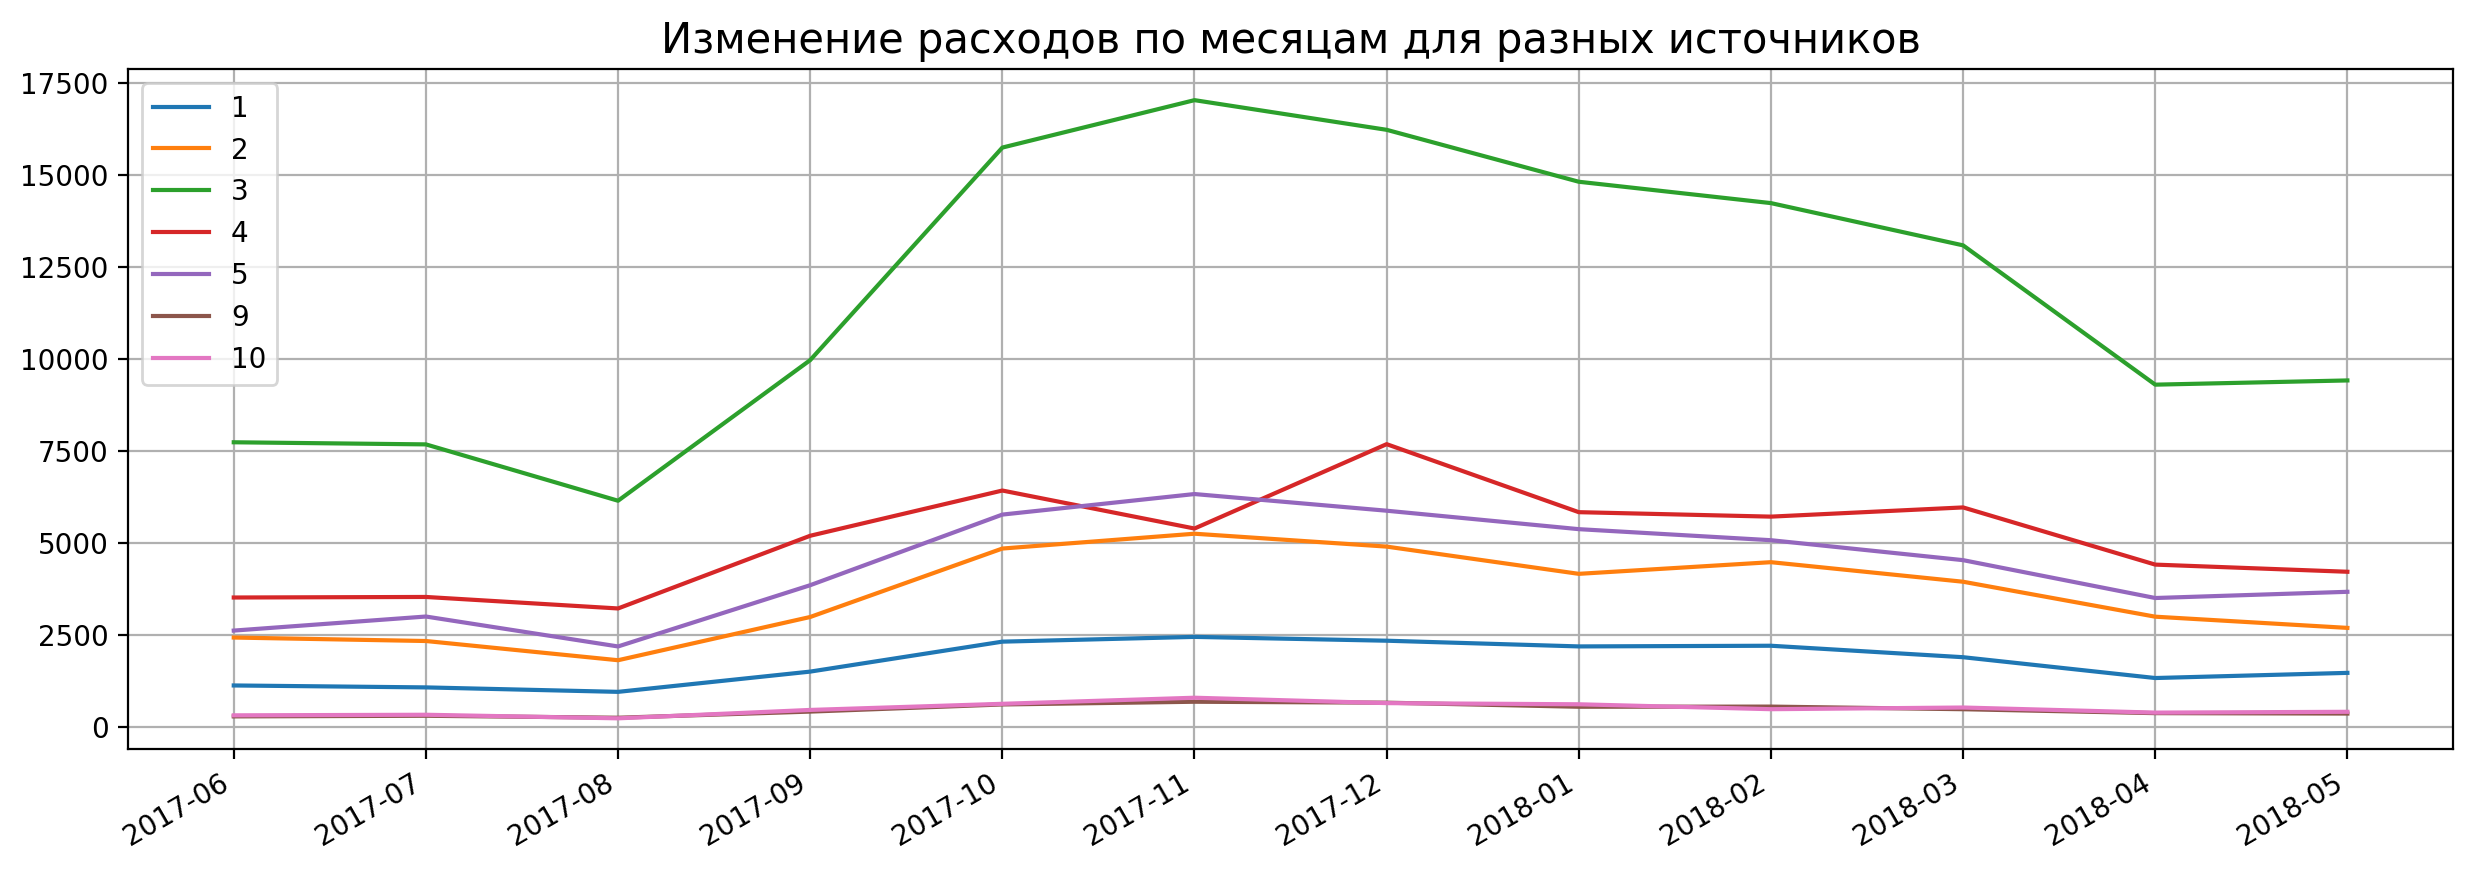

In [45]:
# Определение месяца расходов:
costs['month'] = costs['dt'].astype('datetime64[M]')

# Сводная таблица для расходов по месяцам и источникам траффика:
costs_pivot = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
costs_pivot.index = costs_pivot.index.strftime('%Y-%m')

# Построение графика изменения расходов по месяцам для разных источников:
plt.figure(figsize=(15, 5), dpi = 200)
ax = sns.lineplot(data=costs_pivot, dashes=False)
plt.gcf().autofmt_xdate()
ax.set_title('Изменение расходов по месяцам для разных источников', fontdict = {'fontsize': 15})
ax.grid()
plt.show()
plt.close()

### Вывод:
- Ранее была посчитана суммарная выручка - 252053.78
- Суммарные расходы за весь период - 329131.62
- По графику распределения суммарных расходов по источникам траффика видно, что по источникам 6,7 и 8 расходы отсутствуют.
- Больше всего средств было потрачено на источник 3, причем, если первые три месяца наблюдается небольшое снижение расходов, в последующие 3 месяца резкое увеличение.
- По остальным источникам форма графиков примерно такая же, с той лишь разницей, что изменения расходов лежат в меньшем диапазоне.
- По разбросу значений и суммарным затратам по источнику 3, можно предположить, что был сделан упор именно на этот источник.
- Участки роста и падения совпадают с графиками изменения количества посетителей сайта. В совокупности с тем, что малая часть пользователей возвращаются на сайт в последующие месяцы, можно сделать вывод, что значительно большая часть посетителей - новые, а значит количество посетителей практически напрямую зависит от маркетинговых расходов. 

<a href='#content'>К содержанию</a>

#### <a id="step2.3.2"><a>2.3.2. Расчет CAC

 Необходимо определить, сколько стоит привлечение одного покупателя из каждого источника трафика

In [46]:
# Определение первого посещения для каждого пользователя
first_source = visits.groupby('uid')['start_ts'].min().reset_index()
# Определение источника первого входа
first_source = first_source.merge(visits[['uid', 'start_ts', 'source_id']], on=['uid', 'start_ts'])
# Добавление источника траффика к таблице заказов
orders = orders.merge(first_source[['uid', 'source_id']], on='uid')
orders.head()

buy_ts  revenue                   uid         first_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month order_month  cohort_lifetime  source_id  
0        2017-06-01  2017-06-01                0          1  
1        2017-06-01  2017-06-01                0          2  
2        2017-06-01  2017-06-01                0          2  
3        2017-06-01  2017-06-01                0          2  
4        2017-06-01  2017-06-01                0          3

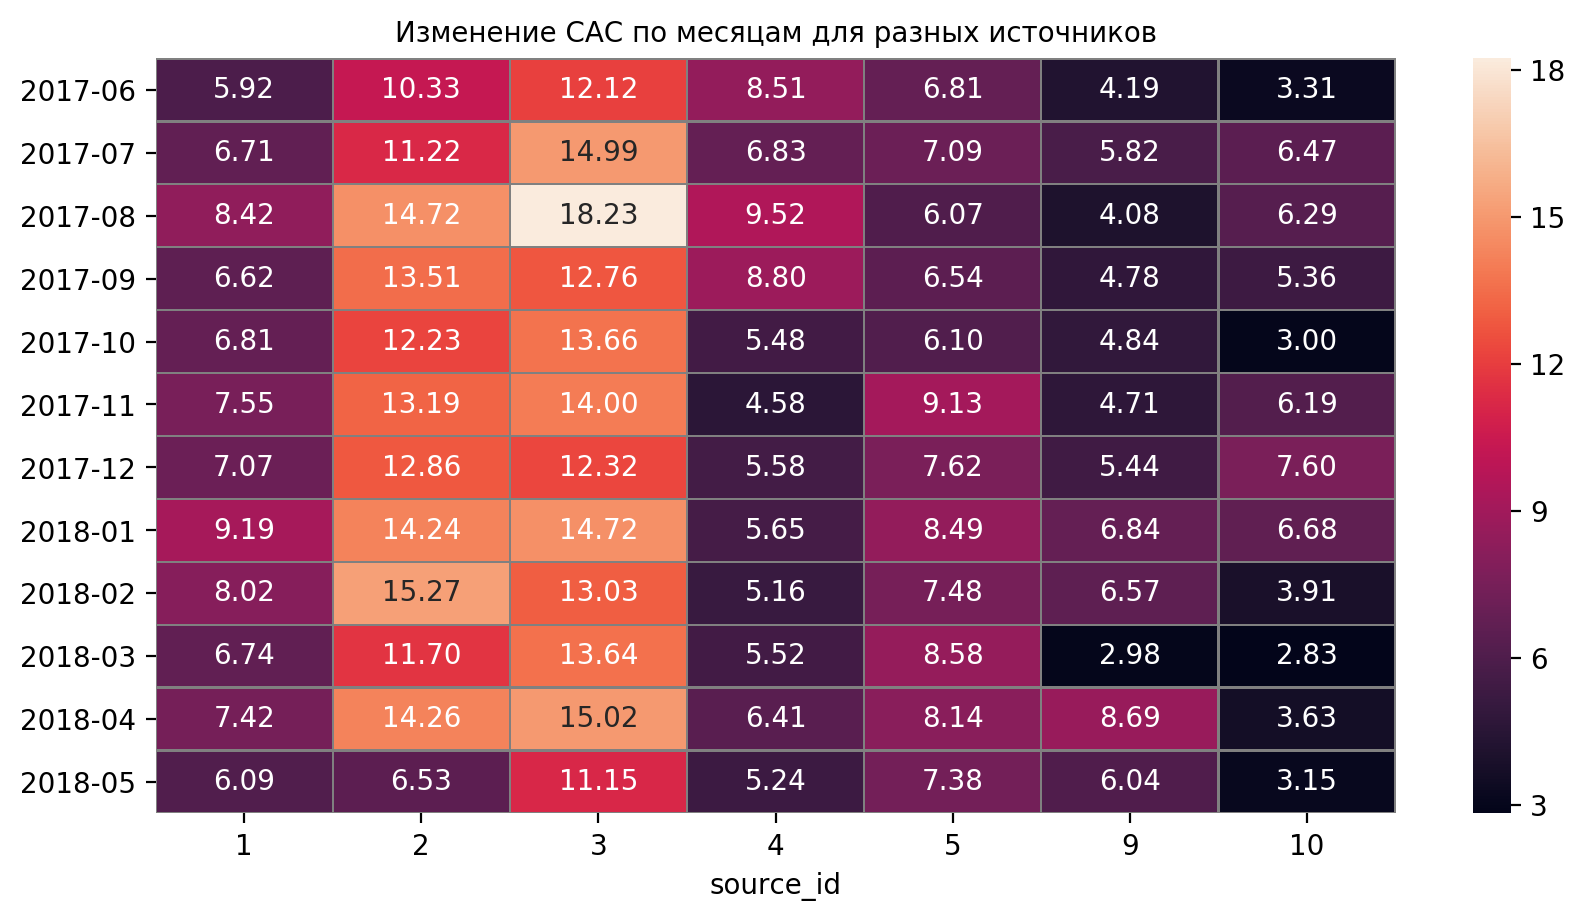

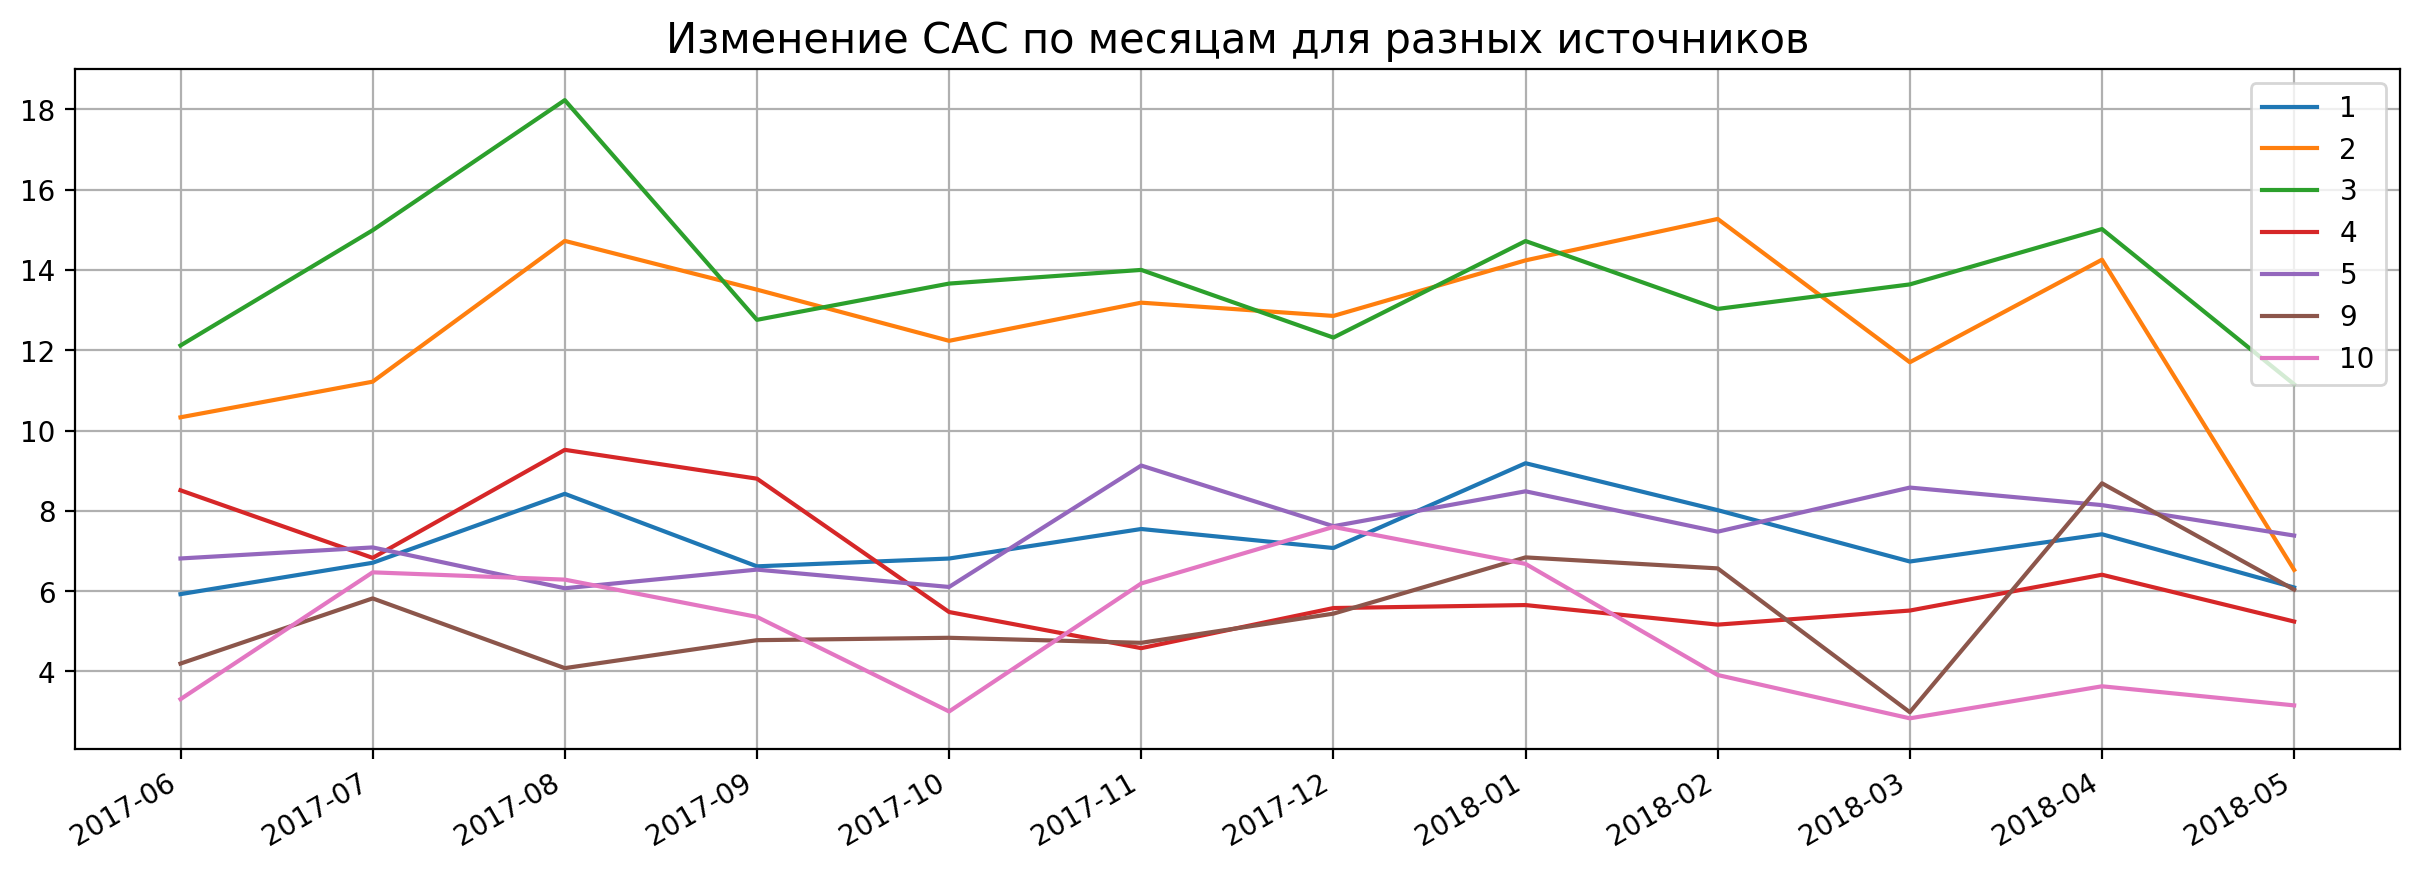

source_id        cac
0          1   7.212107
1          2  12.504068
2          3  13.802743
3          4   6.439374
4          5   7.451938
5          9   5.413892
6         10   4.867125

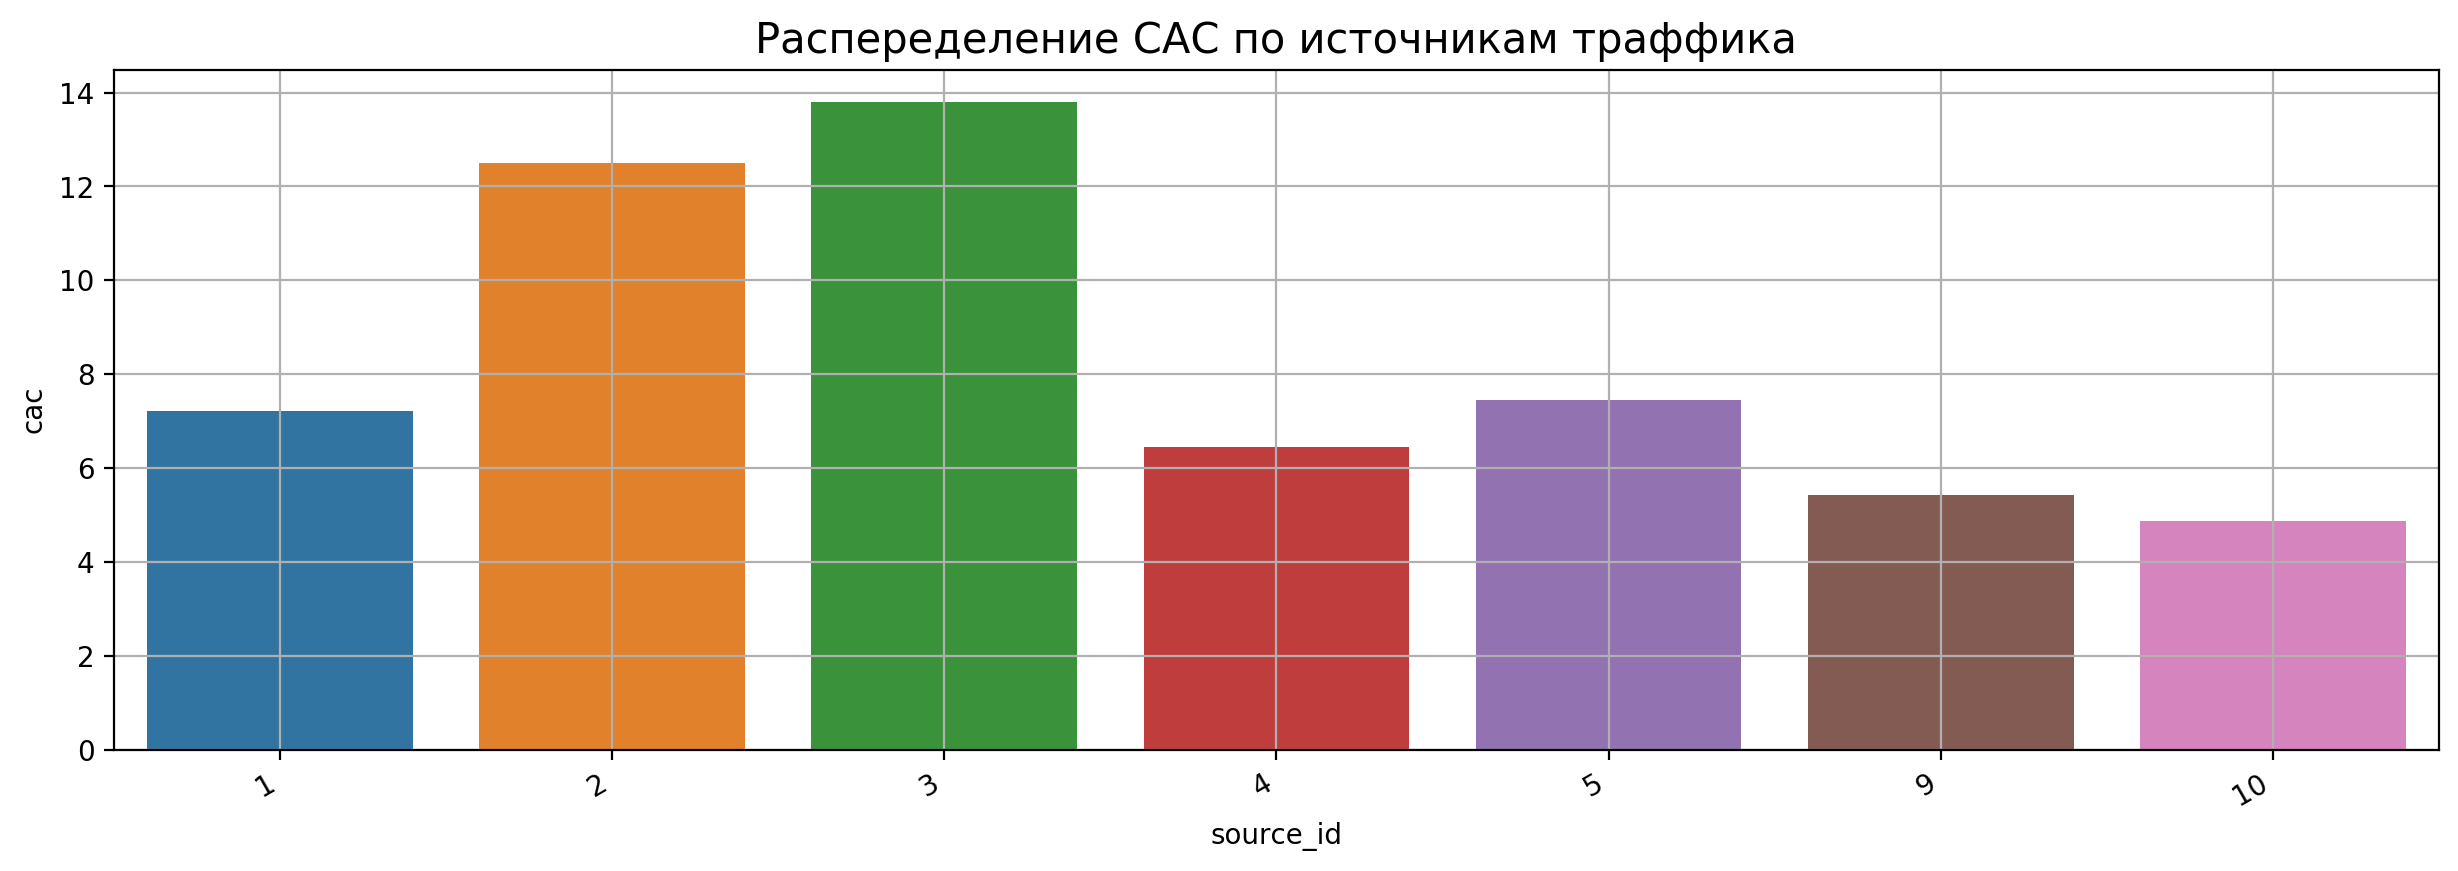

In [47]:
# Расходы по месяцам для разных источников:
monthly_source_costs = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
# Определение количества посетителей по когортам в зависимости от источника траффика:
users_by_source = (orders[orders['cohort_lifetime'] == 0]
                   .groupby(['first_order_month', 'source_id'])
                   .agg({'uid':'nunique'})
                   .reset_index()
                  )
users_by_source = users_by_source.rename(columns={'uid':'n_users'})

# Объединение таблиц
users_costs_by_source = pd.merge(users_by_source, monthly_source_costs, left_on=['first_order_month', 'source_id'],
                                right_on=['month', 'source_id'])
# Рассчет САС
users_costs_by_source['cac'] = users_costs_by_source['costs'] / users_costs_by_source['n_users']

users_costs_by_source_pivot = users_costs_by_source.pivot_table(index='month', columns='source_id',
                                                                values='cac', aggfunc='mean')
users_costs_by_source_pivot.index = users_costs_by_source_pivot.index.strftime('%Y-%m')

# Тепловая карта
heatmap(users_costs_by_source_pivot, 'Изменение САС по месяцам для разных источников', '.2f')

# Построение графика изменения САС по месяцам для разных источников:
plt.figure(figsize=(15, 5), dpi = 200)
ax = sns.lineplot(data=users_costs_by_source_pivot, dashes=False)
plt.gcf().autofmt_xdate()
ax.set_title('Изменение САС по месяцам для разных источников', fontdict = {'fontsize': 15})
ax.grid()
plt.show()
plt.close()

# Среднее значение САС по источникам:
cac_by_source = users_costs_by_source.groupby('source_id').agg({'cac': 'mean'}).reset_index()
# Вывод результирующей таблицы:
display(cac_by_source)
# Построение графика:
barplot(cac_by_source, 'source_id', 'cac', 'Распеределение CAC по источникам траффика')

### Вывод:
- По всем графикам хорошо видно, что самая большая стоимость привлечения клиента у источников 3 и 2. При этом расходы по источнику 3, как было отмечено ранее, значительно превышают остальные.
- По остальным источникам стоимость привлечения одного клиента лежит хоть в достаточно широком, но все же общем диапазоне.
- В целом можно сказать, что стоимость привлечения одного клиента из каждого из источников остается на одном уровне, с некоторыми колебаниями. Ярко выраженной тенденции к росту или падению не наблюдается.

<a href='#content'>К содержанию</a>

#### <a id="step2.3.3"><a>2.3.3. Расчет ROMI по когортам в разрезе источников

In [48]:

def romi(orders, users_costs_by_source, source):
    try:
        # Заказы с первыми заходами пользователя по конкретному источнику:
        orders_source = orders[orders['source_id'] == source]
        # Количество пользователей по когортам
        orders_source_users = (orders_source[orders_source['cohort_lifetime'] == 0]
                               .groupby('first_order_month').agg({'uid':'nunique'})
                               .reset_index()
                              )
        # Группировка по когортам
        orders_source_cohorts = (orders_source
                                 .groupby(['first_order_month', 'cohort_lifetime'])
                                 .agg({'revenue':'sum'})
                                 .reset_index()
                                )
        # Добавление количества пользователей к таблице с когортами:
        orders_source_cohorts = orders_source_cohorts.merge(orders_source_users, on='first_order_month')
        # Расчет LTV
        orders_source_cohorts['ltv'] = orders_source_cohorts['revenue'] / orders_source_cohorts['uid']

        # Формирование отчета - добавление к таблице с когортами ранее посчтинанных значений САС
        report = orders_source_cohorts.merge(users_costs_by_source[users_costs_by_source['source_id'] == source]
                           [['first_order_month', 'cac']], on='first_order_month')
        # Расчет ROMI
        report['romi'] = report['ltv'] / report['cac']

        # Сводная таблица
        output = report.pivot_table(index='first_order_month', columns='cohort_lifetime',
                                    values='romi', aggfunc='mean')
        output.index = output.index.strftime('%Y-%m')
        # Среднее значение ROMI по прошествии 6 месяцев
        romi = output.cumsum(axis=1)[5].mean()
        print ('Среднее значение ROMI источника source_id={:d} за 6 месяцев: {:.2%}'
               .format(source, romi))

        # Построение тепловой карты ROMI
        heatmap(output.cumsum(axis=1).round(2), 'ROMI source_id = {:d}'.format(source), '.0%')
    except:
        print ('Отсутствуют данные по расходам для источника source_id = {:d}, значит ROMI = 100%'.format(source))
        print ('Кол-во заказов из данного источника:', orders[orders['source_id'] == source]['uid'].count())
        romi = 1
    return (romi * 100)

Среднее значение ROMI источника source_id=1 за 6 месяцев: 176.86%


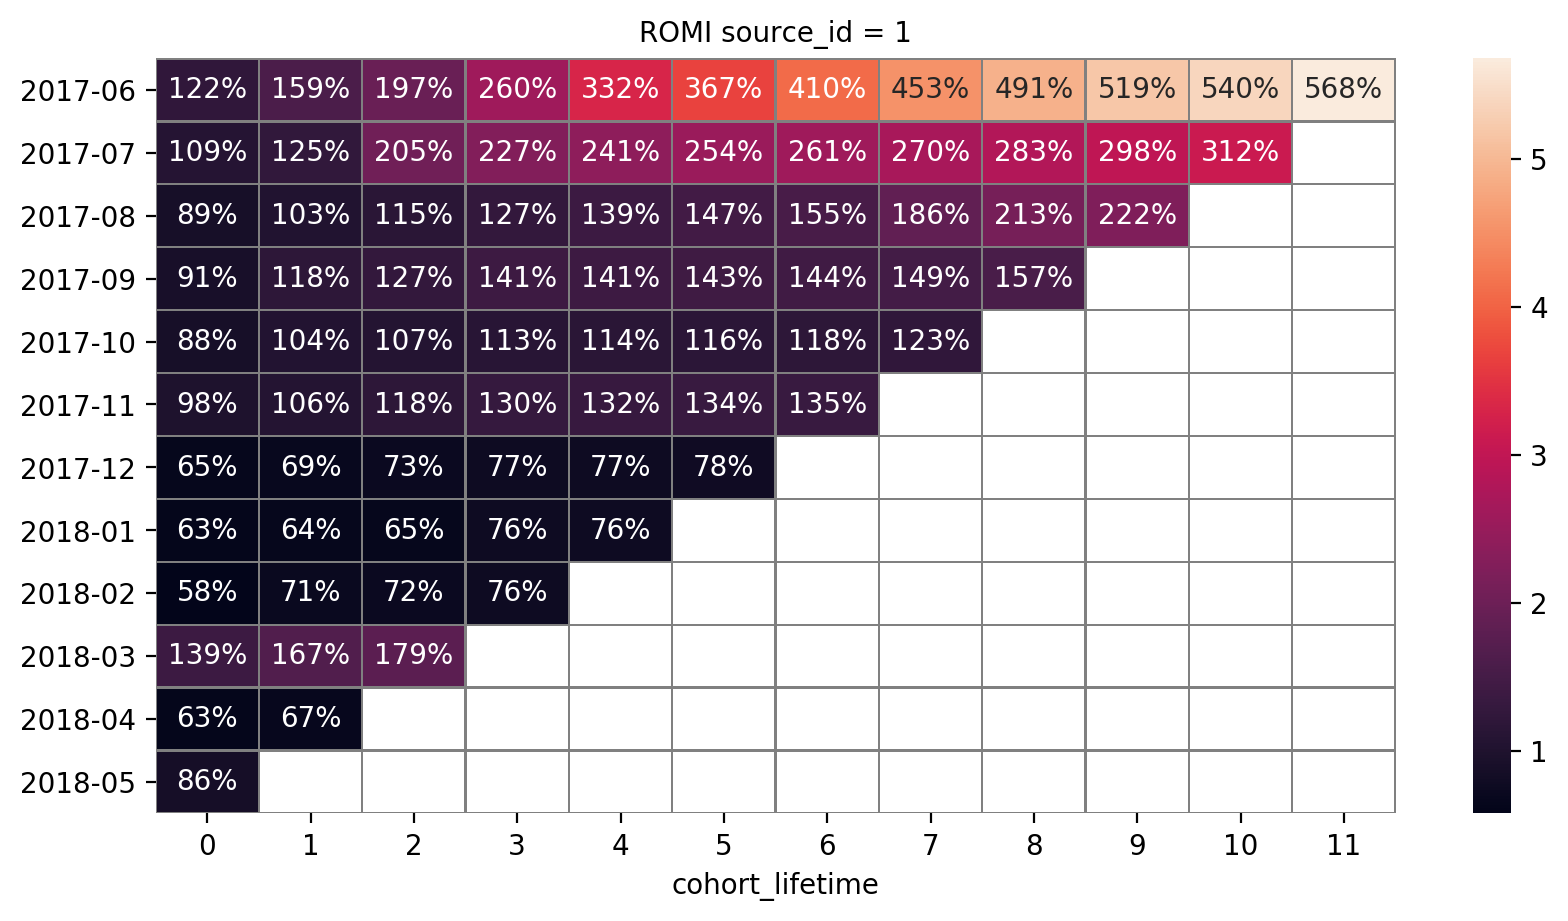

Среднее значение ROMI источника source_id=2 за 6 месяцев: 122.95%


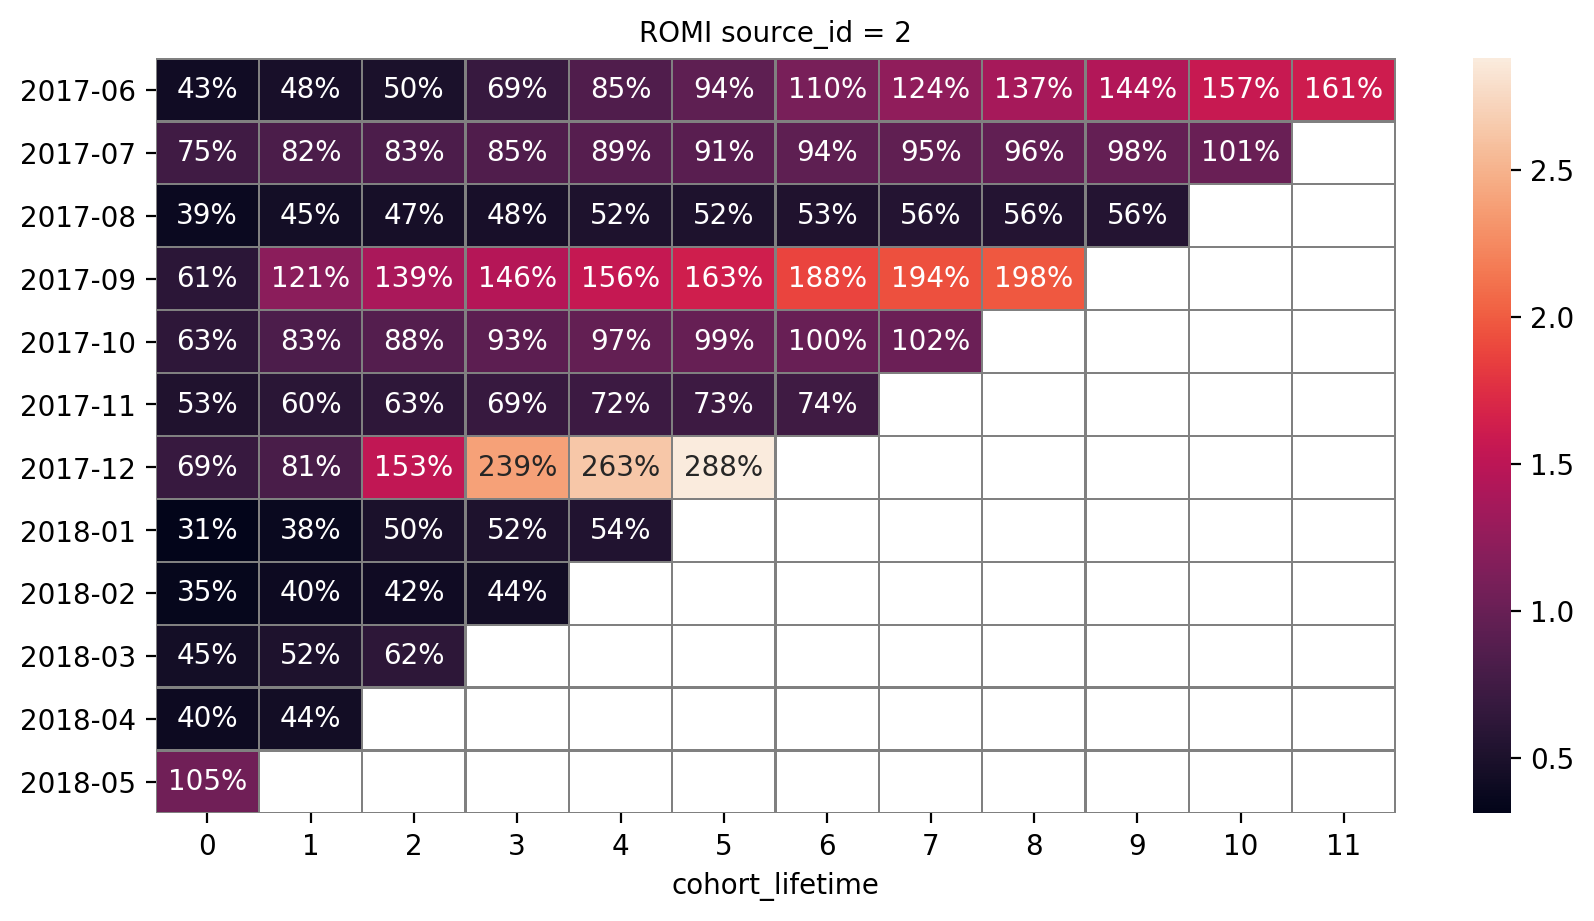

Среднее значение ROMI источника source_id=3 за 6 месяцев: 41.39%


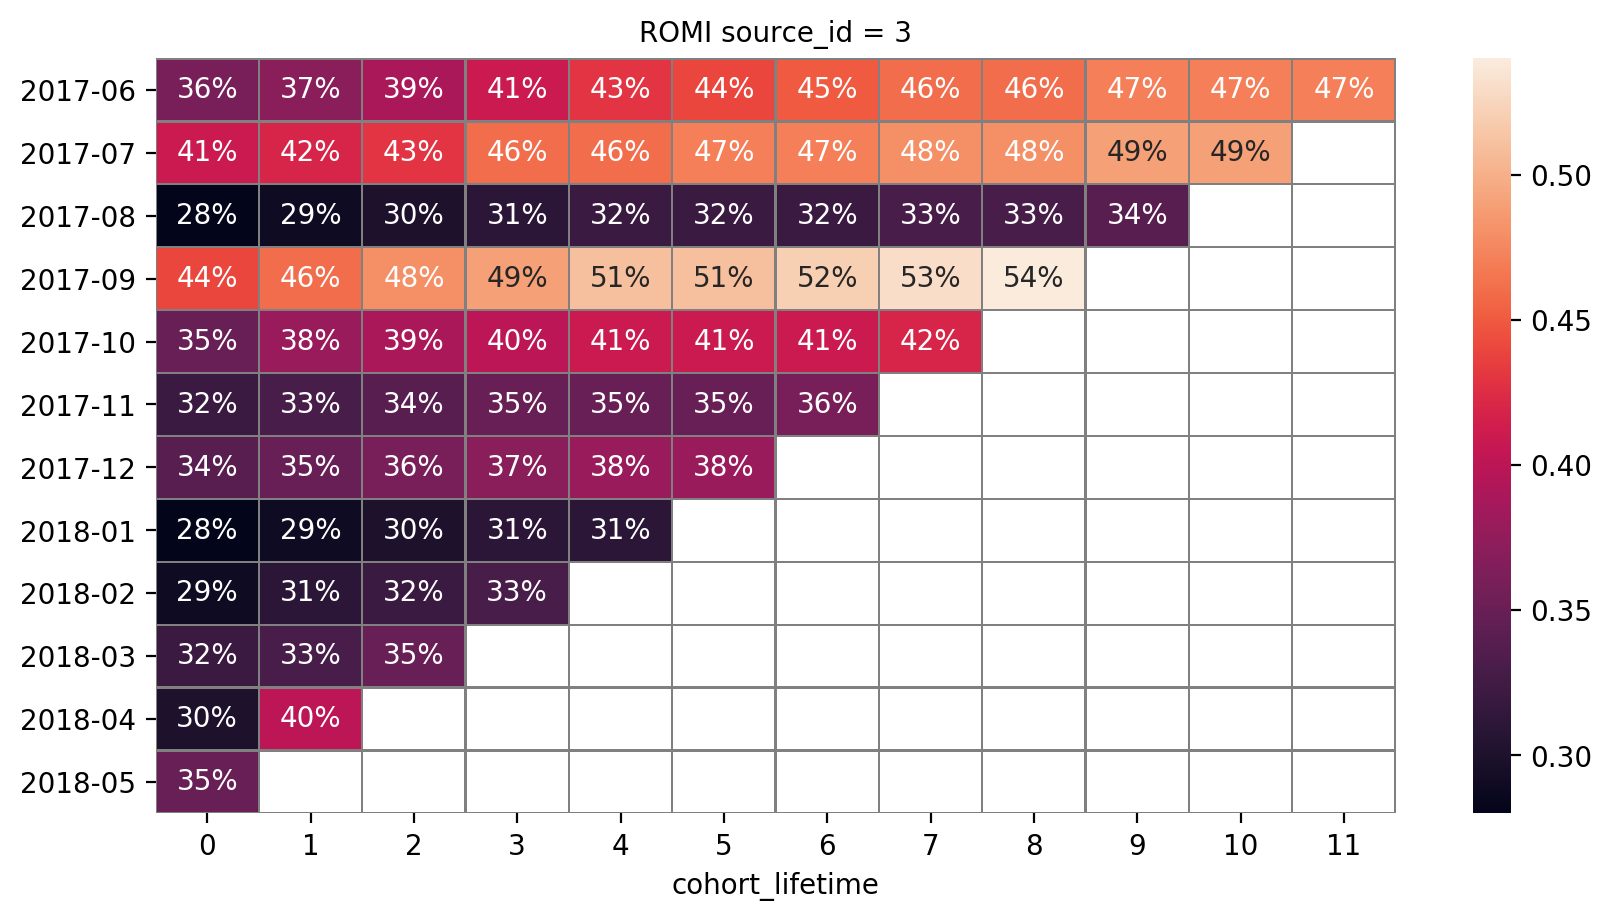

Среднее значение ROMI источника source_id=4 за 6 месяцев: 90.03%


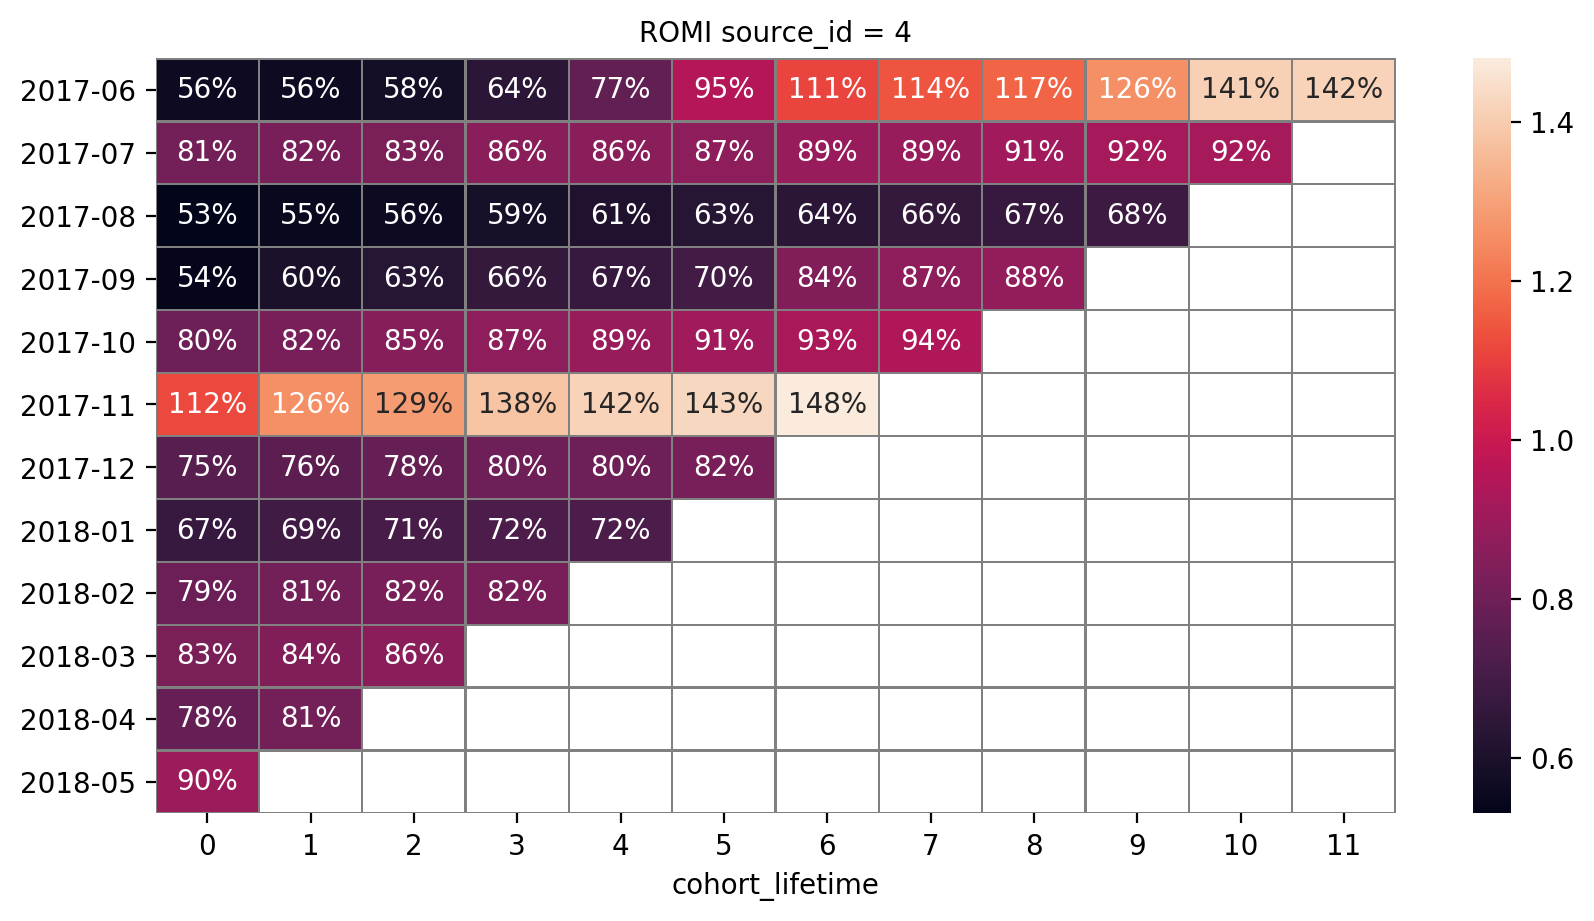

Среднее значение ROMI источника source_id=5 за 6 месяцев: 138.77%


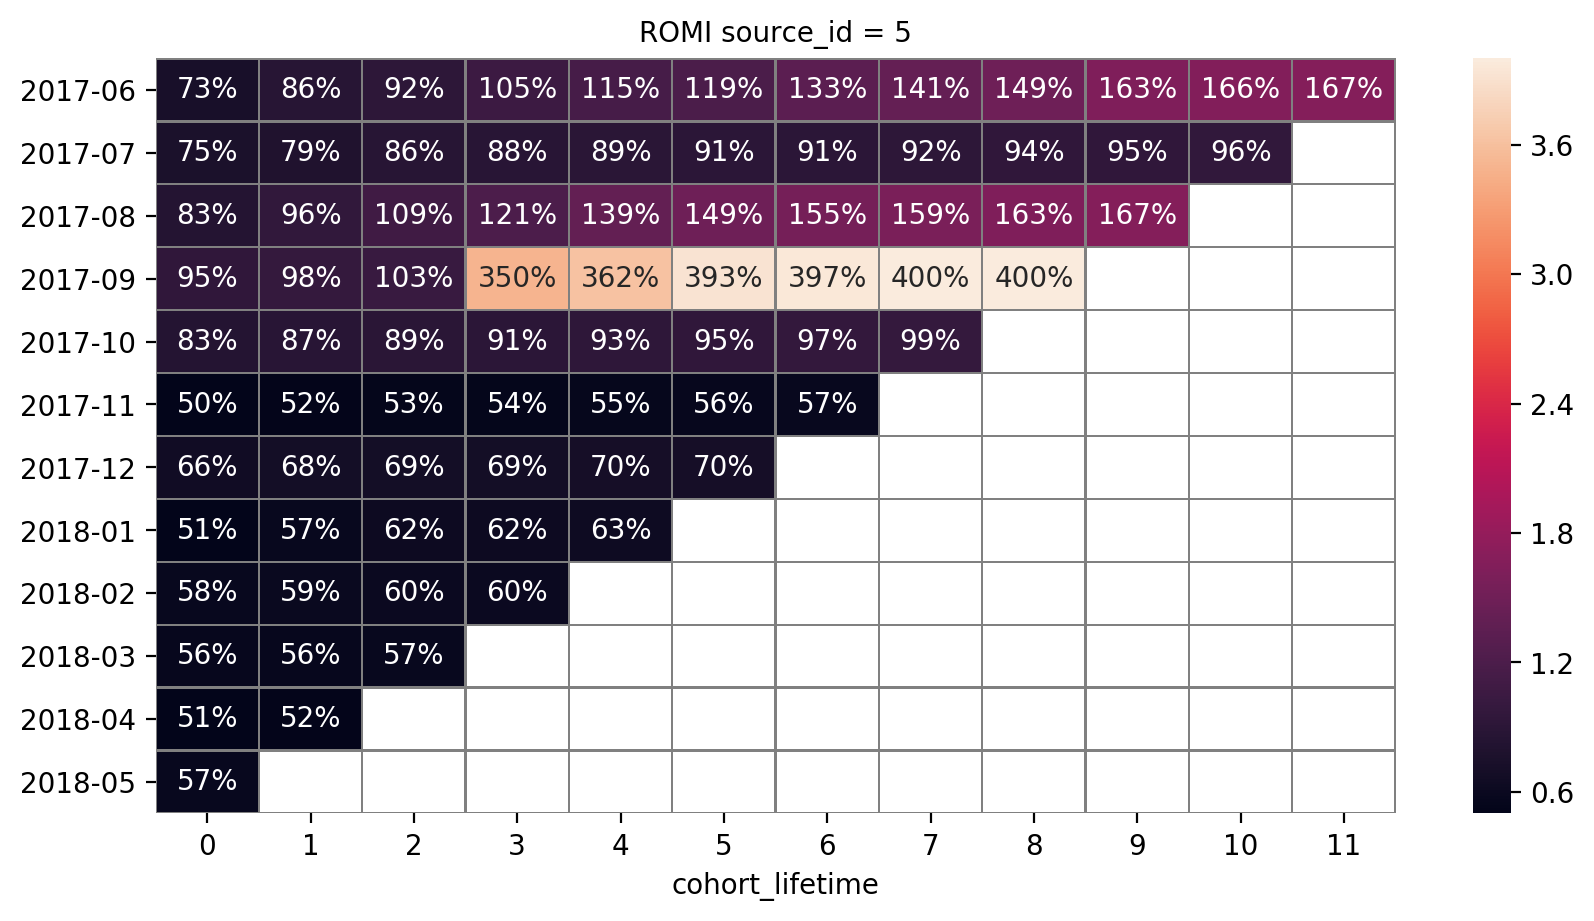

Отсутствуют данные по расходам для источника source_id = 7, значит ROMI = 100%
Кол-во заказов из данного источника: 1
Среднее значение ROMI источника source_id=9 за 6 месяцев: 121.62%


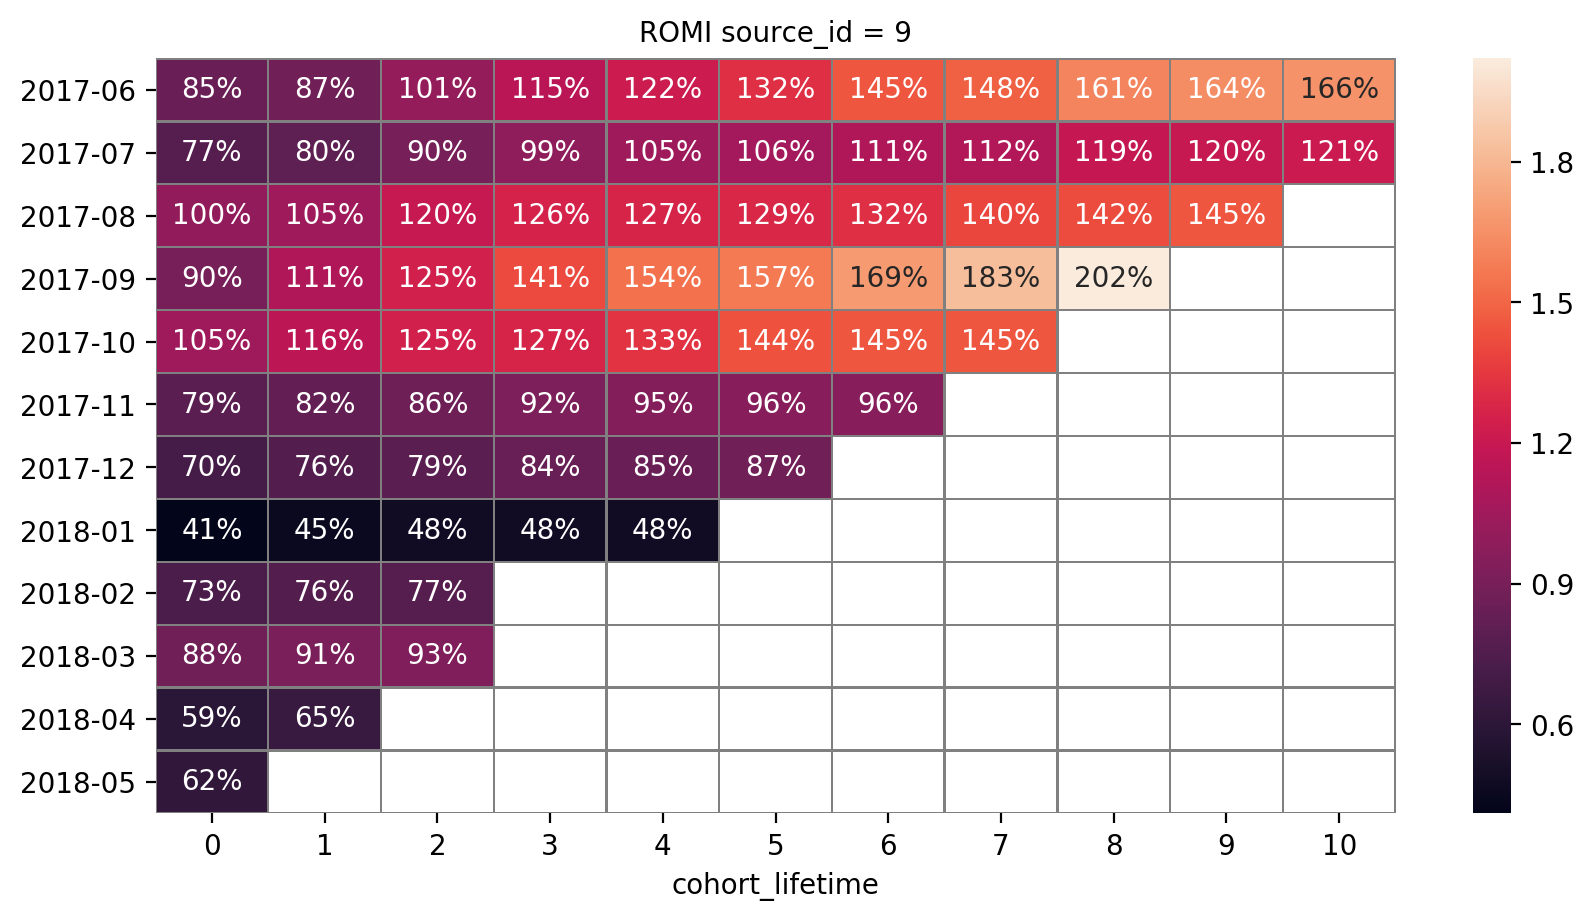

Среднее значение ROMI источника source_id=10 за 6 месяцев: 75.41%


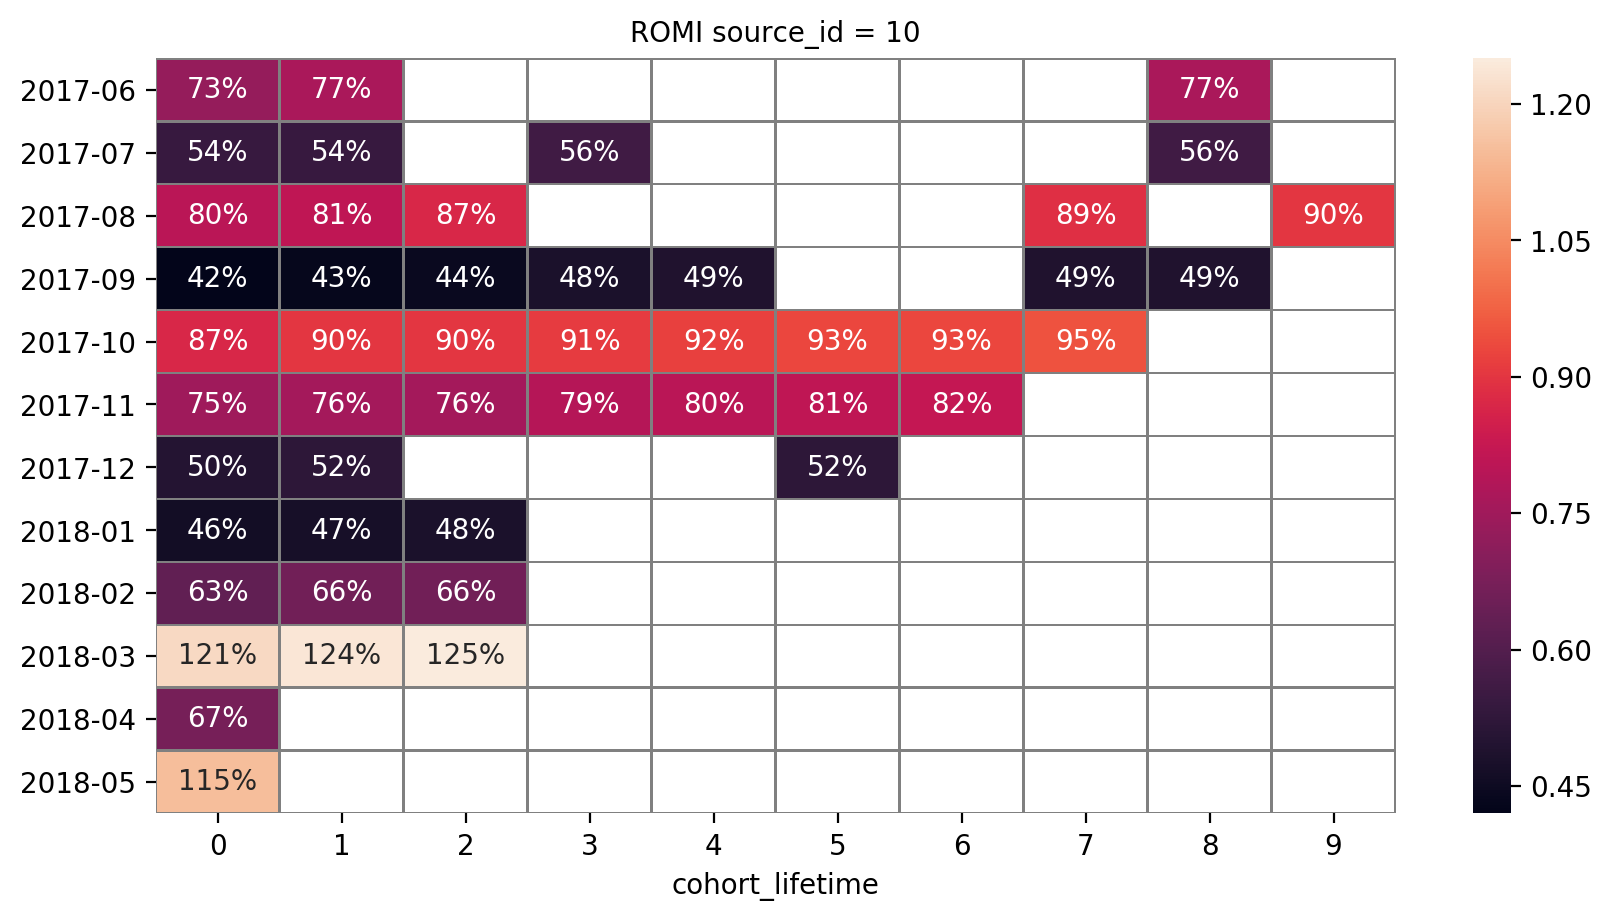

In [49]:
# Значения source_id по которым были сделаны заказы
source_list = orders.sort_values(by='source_id')['source_id'].unique()
# Создание таблицы для заполнения средними значениями ROMI
ROMI = pd.DataFrame(columns=('source_id', 'romi'))
# Цикл по номерам source_id
for source in source_list:
    # Вызов функции romi и заполнение таблицы ROMI
    ROMI = ROMI.append({'source_id' : source , 'romi' : romi(orders, users_costs_by_source, source)},
                       ignore_index=True)
    

source_id        romi
0        1.0  176.857625
1        2.0  122.949566
2        3.0   41.385122
3        4.0   90.029686
4        5.0  138.773115
5        7.0  100.000000
6        9.0  121.621816
7       10.0   75.407075

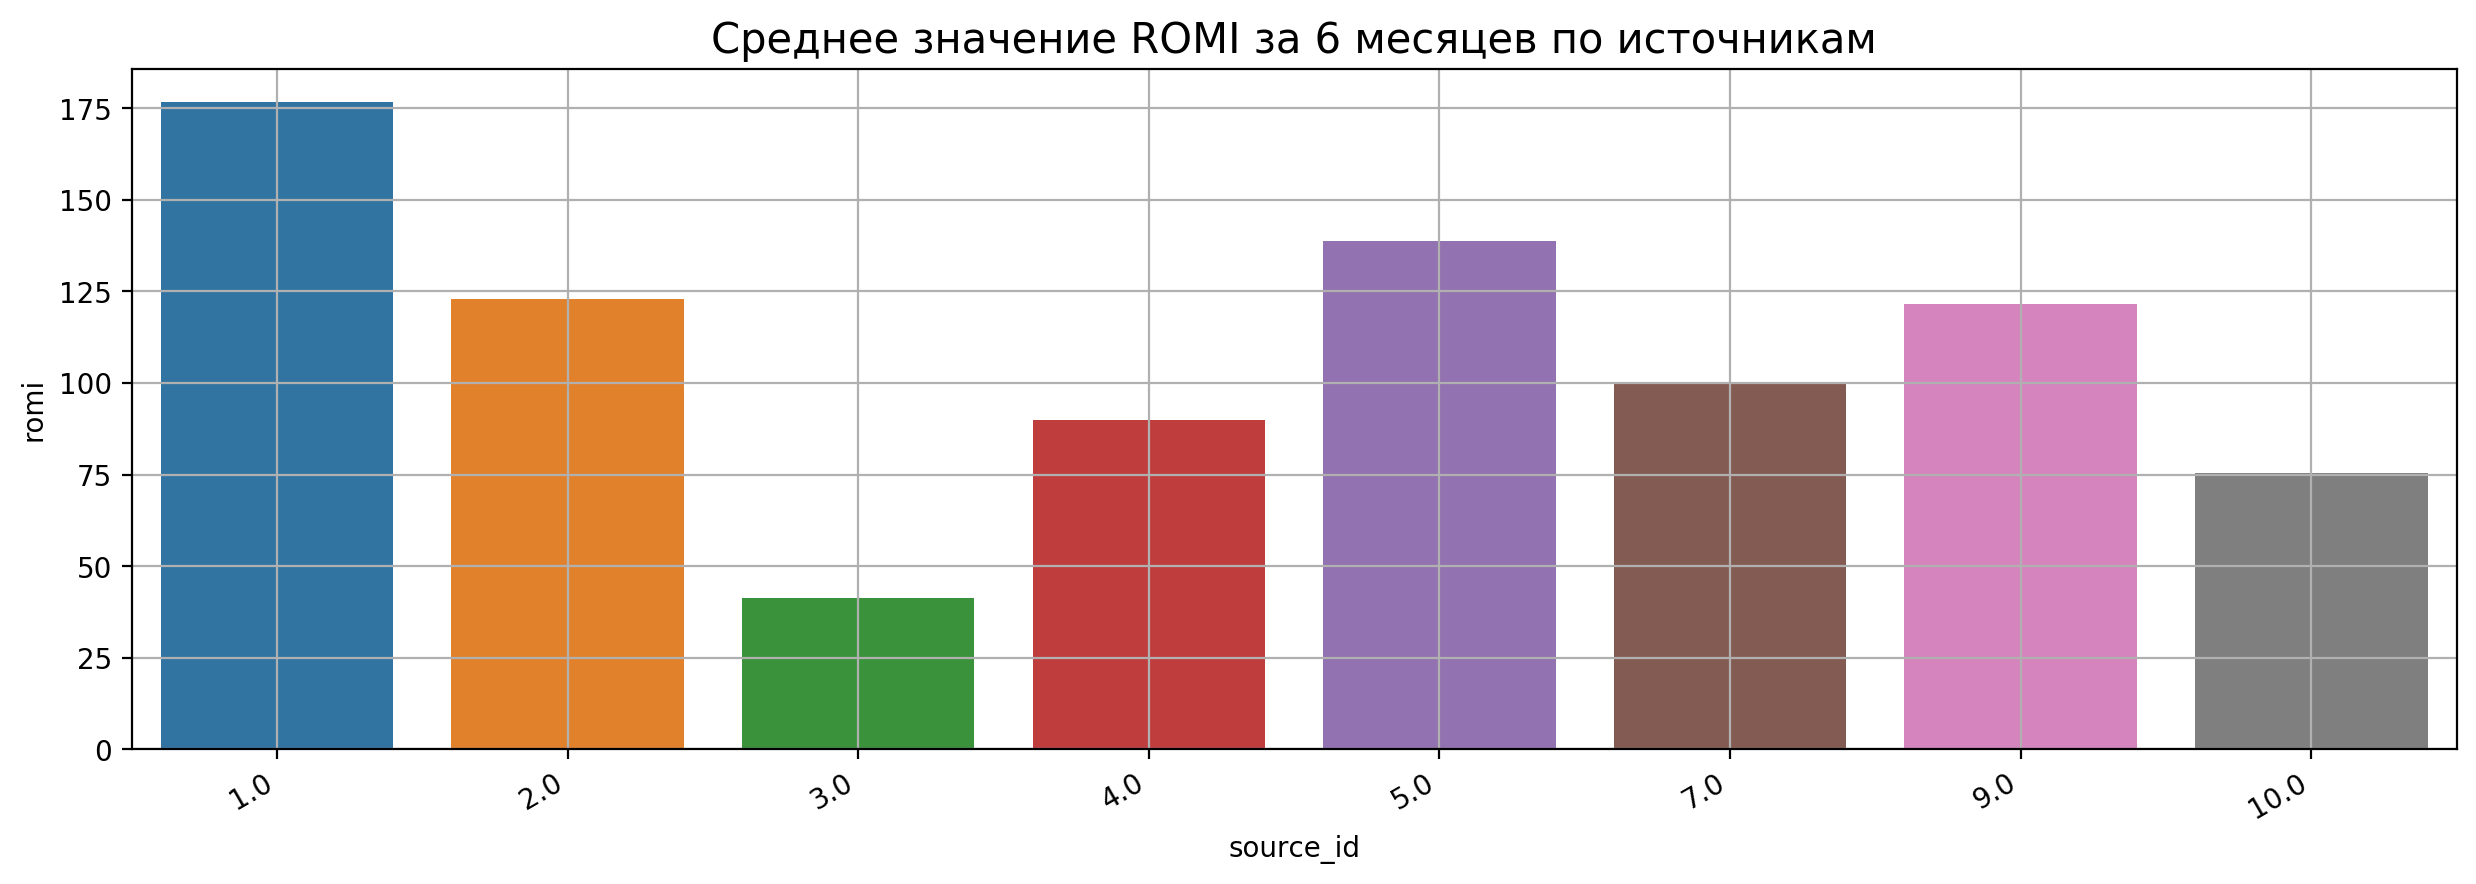

In [50]:
display(ROMI)

barplot(ROMI, 'source_id', 'romi', 'Среднее значение ROMI за 6 месяцев по источникам')

### Вывод:
- По построенным тепловым картам изменения значения ROMI для каждого источника можно сказать:
    - **Источник 1:** из 12 когорт затраты окупились уже в первом месяце у 3, во втором - у 7. Можно сделать вывод о том, что данный источник весьма перспективный. Это подтверждает самое высокое значение ROMI по прошествии 6 мес - он составляет примерно 177%.
    - **Источник 2:** для отдельных когорт расходы окупабтся на 1, 2, 3 месяце, а для остальных более чем через полгода. Несмотря на достаточно высокое среднее за 6 месяцем значение ROMI - около 123%, поведение пользователей из этого источника в когортах сильно отличается друг от друга, можно сказать, что поведение пользователей непредсказуемо.
    - **Источник 3:** по тепловой карте и по среднему за 6 мес значению - 41%, можно сказать, что затраты на привлечение клиентво через этот источник не окупаются.
    - **Источник 4:** расходы по одной из 12 когорт окупились в первый же месяц. Для остальных же, даже по прошествии 6 месяцев затраты окупить не удалось, хотя некоторые значения достаточно близки к 100%
    - **Источник 5:** из первых пяти когорт расходы окупились у 3 на 3-4 месяц. По остальным двум значения достаточно близки к 100%. Для более поздних когорт значение ROMI в первый месяц значительно ниже, чем у первых пяти когорт, а также прирост с течением времени очень небольшой. Однако среднее значение окупаемости по прошествии 6 месяцев для донного источника достаточно большое 139% - это связано с аномальным приростом значения на 3-м месяце существования, ранее упоминавшейся, когорты "2017-09". Видимо, именно из этого источника пришли клиенты, которые в декабре аномально увеличили средний чек, а следом и все остальные метрики.
    - **Источник 7:** из данного источника 1 заказ, т.к. расходы отсутствуют, предполагаем, что значение ROMI = 100%
    - **Источник 9:** за исключением двух когорт значения окупаемости достаточно высокие. Окупаемость на 1-м, 2-м, 3-м месяце для двух, трех, четырех когорт соответственно. По прошествии 6 месяцев из 7-ми когорт со сроком жизни >= 6 мес окупились расходы для 5, остальные 2 близки к значению 100%. Однако стоит отметить, что для когорты "2018-02" на 4-м месяце (при cohort_lifetime = 3) заказы отсутствуют.
    - **Источник 10:** - поведение пользователей, пришедших из этого источника, очень нестабильно: много месяцев с отсутствием заказов. Разброс значений в первый месяц очень большой, но, независимо от первоначального значения,во всех когортах наблюдается очень медленный рост с течением времени.

<a href='#content'>К содержанию</a>

## <a id="step3"><a>Шаг 3. Выводы и рекомендации

- Следует выделить источники с номерами 1 и 9: они имеют меньшую стоимость привлечения клиента, но при этом достаточно высокие средние за 6 месяце значения окупаемости.
- Необходимо обратить внимание на значительный отток пользователей по прошествии первого месяца. Возвращается очень небольшая часть пользователей. Возможно, если бы получилось увеличить значение Retention Rate, то увеличилось кол-во заказов, а за ним и улучшились остальные показатели.
- Исходя из значений Retention Rate и среднего числа покупок, можно сделать предположение, что большая часть заказов приходится на первый месяц, т.е. при cohort_lifetime =0. Причем данные заказы единичные - имеется ввиду, что пользователь совершил одну покупку и больше никогда не аозвращался и лишь очень небольшая часть покупателей регулярно возвращаются и делают повторные заказы.
- Средняя выручка пользователей по когорта в большинстве случаев растер с течением времени, и практически никогда не опускается ниже первоначальнго месяца
- Однозначно стоит выделить как наиболее перспективные когорты "2017-09" и "2017-06", они отлячаются самыми высокими значениями LTV, а также при более детальном рассмотрении распределений значений ROMI в зависимости от источника в большинстве случаем имеют достаточно стабильный и постоянный прирост значения окупаемости. Так же значение среднего числа покупок для когорты "2017-06" является самым высоким.
- Касаемо типа устройства, с которого совершается вход пользователи отдают предпочтение "desktop" - с них происходит большая часть пользовательских сессий, а так же средняя продолжительность сессий с этого утсройства больше.

<a href='#content'>К содержанию</a>